# Исследование данных о российском кинопрокате



Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Особое внимание необходимо уделить фильмам, которые получили государственную поддержку, чтобы понять насколько такие фильмы интересны зрителю. 
В нашем распоряжении данные опубликованные на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

<b>План работ:</b>

<b>Шаг 1: Загрузка и первичный анализ данных</b>

- Импортирую необходимые библиотеки: pandas и matplotlib.
- Загружу датасет из файла в DataFrame с использованием pandas.
- Объеденю два датасета в один DataFrame.
- Первоначально изучу данные с использованием методов head(), info(), и describe() для получения предварительного представления о данных.
- Изучу типы данных и количество пропущенных значений в каждом столбце.

<b>Шаг 2: Предобработка данных</b>

- Выполню поиск пропусков с помощью isnull().sum() для определения количества пропусков в каждом столбце,
- Определю порядок и способы заполнения пропущенных значений там, где это возможно. Опишу причины невозможности заполнения пропусков.
- Выполню заполнение пропусков логичными значениями если это возможно и там, где это возможно.
- Преобразую типы данных с помощью метода dtypes в столбцах, которые нуждаются в изменении типов данных.
- Изуче категориальные, просматрю их на наличие аномалий.
- Изучу уникальные значения в столбцах с названиями фильмов, стран, режиссеров и пр.
- Исправлю неявные дубликаты, используя методы replace(), чтобы унифицировать значения в столбцах там, где это возможно.
- Изучу количественные столбцы на наличие аномалий и при возможности исправлю их. Удалю выбросы, если они есть и могут оказать влияние на дальнейший анализ.

<b>Шаг 3: Добавление новых столбцов</b>

- Создам столбец с годом выхода фильмов для более удобного временного анализа.
- Добавлю столбец с главным режиссёром и основным жанром для более детального анализа.
- Создам столбец с долей государственной поддержки от общего бюджета для анализа финансового влияния.

<b>Шаг 4: Исследовательский анализ данных</b>

- Изучу динамику выхода фильмов по годам, чтобы выявить тренды в выпуске фильмов с течением времени.
- Изучу динамику сборов по годам и постараюсь выявить закономерности.
- Изуче влияние возрастных ограничений на сумму сборов. Проанализирую, как возрастные ограничения влияют на кассовые сборы фильмов.
- Проведу исследование фильмов с государственной поддержкой. Изучу, как государственная поддержка влияет на кассовые сборы и успех фильмов.

<b>Общий вывод</b>

На основе проделанной работы сформулирую общие выводы и дам рекомендации по улучшению качества данных и стратегии анализа.

## Откройтие файлов с данными, объединение их в один датафрейм и изученние общей информации.

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
!pip install missingno

In [2]:
# импорт matplotlib
import matplotlib.pyplot as plt
# импорт библиотеки pandas
import pandas as pd
# импорт библиотеки missingno
import missingno as msno
# импорт библиотеки numpy
import numpy as np

# чтение файла с данными и сохранение в data
shows_data = pd.read_csv('/datasets/mkrf_shows.csv')

# зададим формат отображения вещественных чисел в Pandas
pd.set_option('display.float_format', '{:,.2f}'.format)

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)

# Сброс ограничений на число строк
pd.set_option('display.max_rows', None)

# Сброс ограничений на количество символов в записи
pd.set_option('display.max_colwidth', None)

In [3]:
# чтение файла с данными и сохранение в data
movies_data = pd.read_csv('/datasets/mkrf_movies.csv')
# получение первых 20 строк таблицы data
movies_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


In [4]:
# получение первых 20 строк таблицы data
shows_data.head()

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"


In [5]:
# Увеличиваем количество символов, отображаемых в ячейке вывода
pd.set_option('display.max_colwidth', None)

# Устанавливаем формат отображения чисел с двумя знаками после запятой
pd.set_option('display.float_format', '{:.2f}'.format)

In [6]:
# получение общей информации о данных в таблице data
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [7]:
# получение общей информации о данных в таблице data
shows_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


<div class="alert alert-info"> Для дальнейшего анализа необходимо объединить данные двух таблиц в одну. В обеих таблицах присутствует столбец с уникальным номером прокатного удостоверения. Выполним объединение по значениям этого столбца, предварительно приведя его в обеих таблицы к единому строковому типу данных.</div>

In [8]:
# Приводим puNumber в обоих DataFrame к строковому типу
movies_data['puNumber'] = movies_data['puNumber'].astype(str)
shows_data['puNumber'] = shows_data['puNumber'].astype(str)

In [9]:
# Теперь объединяем данные
all_data = pd.merge(movies_data, shows_data, on='puNumber', how='left')
all_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

<div class="alert alert-info">В итоговую таблицу вошли все строки из обоих исходных датасетов. Так как строк в датасете shows_data почти вдвое меньше чем в movies_data, в итоговой таблице ячейки в строках для которых нет значений заполнены пропусками (NaN). Данные успешно объеденены, можно приступать к дальнейшей работе по подготовке к анализу.</div>

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
А вот тут не хватает промежуточного вывода по итогу раздела + надо добавить проверку на количество данных после объединения.  

## Предобработка данных

### Проверка типов данных

- Проверим типы данных в датафрейме и преобразуем их там, где это необходимо.

In [11]:
# вывод общей информации
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

В столбце ratings указан тип данных object, но там числовые данные. Посмтрим на уникальные значения столбца.

In [12]:
# вывод уникальных значений столбца ratings
all_data['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Данные в столбце представлены в двух вариантах дробные числа для расчета рейтинга по шкале от 0 до 10, и проценты для рассчета рейтинга по шкале от 0% до 100%. Приведем все к единому значению для представления рейтинга по шкале от 0 до 10.

In [13]:
# в процентных значениях удалим знаки % и разделим значения на 10
def convert_rating(x):
    if isinstance(x, str):
        if '%' in x:
            return float(x.replace('%', '')) / 10
        else:
            return float(x)
    return x

all_data['ratings'] = all_data['ratings'].apply(convert_rating)

In [14]:
# вывод уникальных значений столбца ratings для проверки замены
all_data['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

В столбцах refundable_support, nonrefundable_support, budget, ratings, box_office изменим тип данных с float64 на float32 для оптимизации объемов занимаемой памяти.

In [15]:
# изменение типов данных для выбранных столбцов
column_to_type = ['refundable_support', 'nonrefundable_support', 'budget', 'ratings', 'box_office']
for column in column_to_type:
    all_data[column] = all_data[column].astype('float32')

In [16]:
# вывод общей информации
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float32
 10  nonrefundable_support  332 non-null    float32
 11  budget                 332 non-null    float32
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   float32
 14  genres                 6510 non-null   object 
 15  box_

### Изучим пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

In [17]:
# подсчёт пропусков
all_data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7154
nonrefundable_support    7154
budget                   7154
financing_source         7154
ratings                   967
genres                    976
box_office               4328
dtype: int64

<AxesSubplot:>

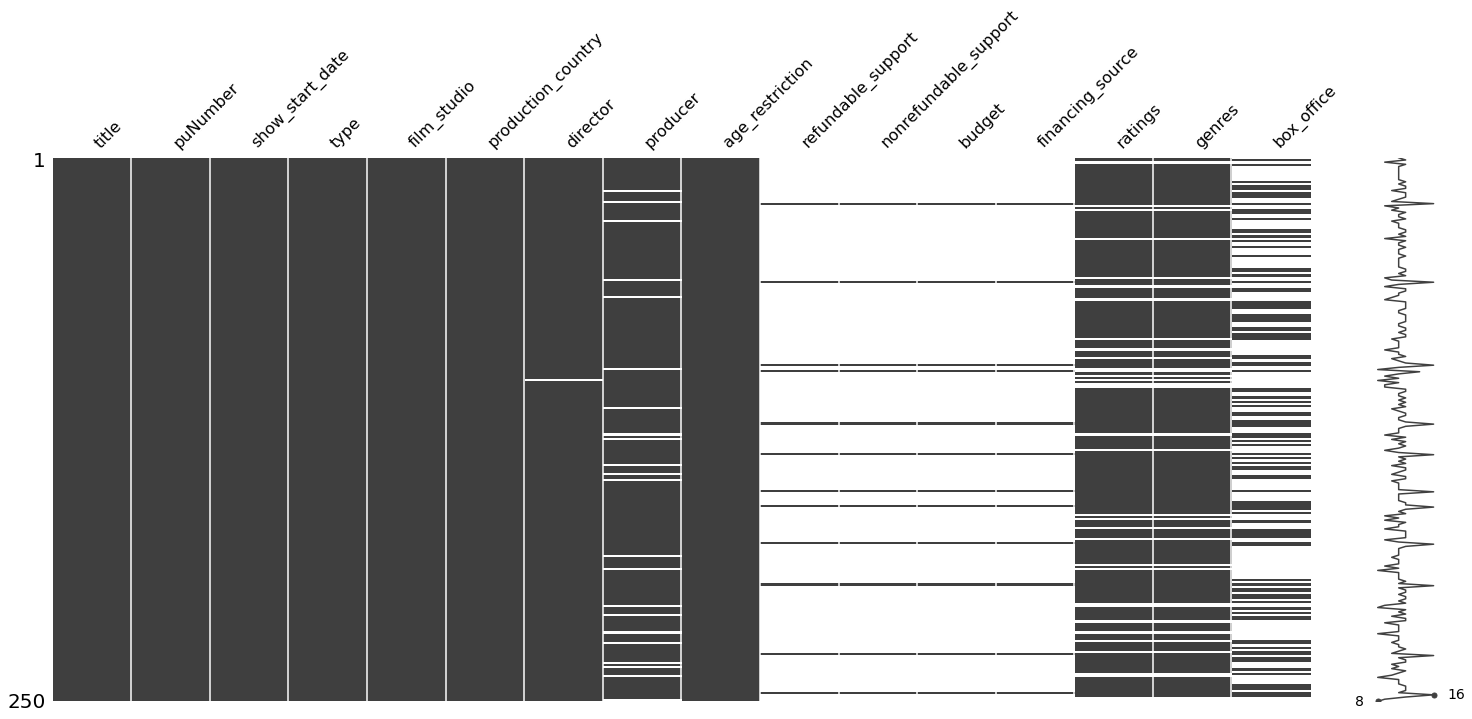

In [18]:
%matplotlib inline
msno.matrix(all_data.sample(250))

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А тут можешь попробовать визуализировать пропуски таким методом https://under-sky-ai.ru/post/instrument_vizualizatsii_otsutstvuyuschih_znacheniy_dannyih-missingno

<div class="alert alert-info">Во многих столбцах присутствуют пропуски. По графику видны определенные закономерности в пропусках. Например данные о бюджете есть только в строках имеющих данные о гос. поддержке, фильмы с пропусками в данных о жанре также имеют пропуски в данных о рейтинге.

Чтобы понять можно ли заполнить пропуски и каким образом, необходимо посмотреть на них поближе.</div>

#### Пропуски в столбце 'film_studio'

In [19]:
# вывод строк с пропусками в столбце film_studio
all_data.query('film_studio.isnull()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1293,Stars in Shorts,121011114,2014-06-03T12:00:00.000Z,Художественный,NaN,"США, Великобритания","Роберт Фестингер, Руперт Френд, Джей Камен, Нил Лабут, Бенжамин Грейсон, Крис Фоггин","Татьяна Келли, Роберта Мунро, Руперт Френд, Дон Бриджетвотер, Тим Хармс, Бенжамин Грейсон, Крис Кроучер",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.30,комедия,NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
6105,Значит любит,111013818,2018-08-10T12:00:00.000Z,Художественный,NaN,Россия,А.Краевский,Е.Щербакова,«18+» - запрещено для детей,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6181,Несейка. Младшая дочь,112007018,2018-09-01T12:00:00.000Z,Документальный,NaN,Россия,В.Марин,"Д.Якунин, Ф.Абрютин, О.Филонова",«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6379,Ян Антонышев,112011818,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6380,Ян Антонышев,112011918,2018-11-15T12:00:00.000Z,Документальный,NaN,Россия,Е.Окопная,Е.Герасимов,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6399,Доживем до каникул?..,111021918,2018-11-15T12:00:00.000Z,Художественный,NaN,Россия,Я.Хальпукова (псевдоним Яна Мартынец),Я.Хальпукова (псевдоним Яна Мартынец),«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,41225.00
6485,До и После,112014418,2018-12-05T12:00:00.000Z,Документальный,NaN,Россия,А.Новокреповская,А.Новокреповская,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.90,"драма,криминал,детектив",NaN
6494,Калмыцкий геше Нгаванг Вангьял,113002018,2018-12-05T12:00:00.000Z,Научно-популярный,NaN,Россия,И.Долгина,И.Долгина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6497,Мой папа Чингисхан,112014918,2018-12-06T12:00:00.000Z,Документальный,NaN,Россия,А.Сайфуллина,А.Сайфуллина,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Судя по фильмам в отфильтрованных данных, пропуски в столбце 'film_studio' означают что данный фильм снимался без участия какой-либо киностудии. Это могут быть авторские проекты режисеров, независимое кино. Так как эти данные в дальнейшем анализе не участвуют, оставим пропуски в этом столбце как есть.

#### Пропуски в столбце 'production_country'

In [20]:
# вывод строк с пропусками в столбце production_country
all_data.query('production_country.isnull()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
3186,"Детский юмористический киножурнал ""Ералаш. Ну просто фантазтика!""",111001216,2016-02-09T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ЕРАЛАШ""",NaN,"Р.Светлов, И.Магитон, А.Арутюнян, Л.Мирский, А.Зеленков, М.Сулейманова и др.","ООО ""Продюсерский центр ЕРАЛАШ""",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.20,"детский,комедия",194527.00
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,NaN,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN


Оба произведения выпускались российскими компаниями (киногруппами). Заполним пропуски указав в качестве страны производства Россию.

In [21]:
# замена пропущенных значений в столбце 'production_country' на ноль
all_data['production_country'] = all_data['production_country'].fillna('Россия')

#### Пропуски в столбце 'director'

In [22]:
# вывод строк с пропусками в столбце director
all_data.query('director.isnull()')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
764,"Три звезды. Концерт в Waldbuhne Theater, Берлин. Анна Нетребко. Йонес Кауфман. Эрвин Шрот.",126003512,2012-12-04T12:00:00.000Z,Прочие,Райзинг Алтернатив,Великобритания,NaN,Вальдбюне Театр,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,44350.00
1735,Помпеи. Британский музей,126003413,2013-09-11T12:00:00.000Z,Прочие,"МортуСкрин, Британский музей",Великобритания,NaN,Британский музей,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3840,Зур концерт (Большой концерт).,217027010,2010-06-24T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4052,"Ганс Сэйфуллин ""Авылым чишмэлэре. Ганс Сэйфуллиннын 50 еллык ижат юбилеена багышланган концерт"". (Родники деревни. Юбилейный концерт, посвященный 50-летию творчества Ганса Сайфуллина.)",217017310,2010-04-22T12:00:00.000Z,Художественный,"ООО ""Барс-Рекордс""",Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4298,Изге Вэли (Святой Валентин),217020610,2010-05-20T12:00:00.000Z,Художественный,"ООО ""Барс Рекордс""",Россия,NaN,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4415,Bon Jovi. The Circle Tour,126001710,2010-11-11T12:00:00.000Z,Прочие,Эншутц Интертейнмент Груп,США,NaN,Эншутц Интертейнмент Груп,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,7.90,"концерт,музыка",NaN
4441,Мульт личности. Выпуск 5,214000410,2010-01-25T12:00:00.000Z,Художественный,NaN,Россия,NaN,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,4.00,"мультфильм,комедия",NaN
4923,Георг Фридрих Гендель. Мессия. Оратория. Королевский колледж Кембриджа,126001111,2011-04-25T12:00:00.000Z,Прочие,Опус Арт,Великобритания,NaN,Короевский колледж Кембриджа,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4942,Питер Гэбриэл и New Blood Orchestra 3D,126002711,2011-11-11T12:00:00.000Z,Прочие,Омниверс Визион,Великобритания,NaN,Омниверс Визион,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,6.70,"концерт,музыка",NaN


Судя по данным таблицы, пропуски в столбце director у произведений, которые могли быть сняты без участия режиссера (например записи концертов, видео экскурсии по музеям и пр.). Так как заполнить данные о режисерах с помощью логическиой замены невозможно, а другие данные в этих строках будут полезны в дальнейшем исследовании, то оставим пропуски как есть.

#### Пропуски в столбце 'producer'

In [23]:
# вывод строк с пропусками в столбце producer
all_data.query('producer.isnull()').head(10)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN
5,Остановился поезд,111013816,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Абдрашитов,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,NaN
6,Любовь и голуби,111007013,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,В.Меньшов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,"мелодрама,комедия",2700.00
9,Отпуск за свой счет,111019114,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм"", Телевидение ВНР","СССР, Венгрия",В.Титов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"мелодрама,комедия",NaN
11,Ответный ход,111019014,2014-12-01T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,М.Туманишвили,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.80,"боевик,драма,приключения",NaN
15,Председатель,111014916,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Салтыков,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.30,драма,NaN
16,Осенний марафон,111007513,2013-10-18T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Г.Данелия,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,8.00,"драма,мелодрама,комедия",NaN
17,Осень,111027914,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,А.Смирнов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.40,"драма,мелодрама",NaN
18,Неподдающиеся,111003616,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Ю.Чулюкин,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,8.00,"мелодрама,комедия",360.00
19,Неподсуден,111003716,2016-02-12T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"В.Краснопольский, В.Усков",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,7.70,драма,420.00


<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Можно было не выводить весь датасет. Вряд ли бы ты их все визуально просаматривала 

<div class="alert alert-info"><b>Комментарий студента:</b>
    На самом деле просматривала, но не собиралась выводить все данные в отправленной работе. Перед отправкой забыла поправить. Спасибо за напоминание.</div>

В выведенных строках таблицы нет данных о продюссерах для произведений, созданных в СССР. Как такового понятия продюссер в советском кино не было. Возможно это не пропуски, а отсутствие продюссера как такового. Проверим гипотезу выведя уникальные значения столбца "production_country" для всез строк с пропусками в столбце "producer".

In [24]:
# вывод уникальных значений production_country для строк с пропусками в столбце producer
all_data[all_data['producer'].isnull()]['production_country'].unique()

array(['СССР', 'СССР, Венгрия', 'Чехословакия', 'США',
       'Россия, Казахстан, США', 'СССР, Швеция',
       'СССР, Франция, Англия, Куба, ГДР',
       'СССР, ЧССР, Западный Берлин, ПНР', 'СССР, Италия',
       'Франция - Италия - Великобритания - США', 'Чехия',
       'СССР, Финляндия', 'Великобритания - США', 'Япония',
       'СССР, Польша', 'СССР - Швейцария - Франция', 'Франция',
       'Великобритания', 'Австралия', 'Италия', 'Украина',
       'Франция-Бельгия', 'Мексика - Франция',
       'Великобритания - Германия', 'Россия', 'Иран',
       'Республика Узбекистан', 'Бразилия', 'Италия ', 'Франция - Россия',
       'Индонезия', 'СССР, ФРГ, Западный Берлин',
       'США - Канада - Афганистан - Бельгия - Франция',
       'США - Великобритания - Германия - Новая Зеландия - Бельгия - Франция',
       'Бельгия - Испания - Канада - Нидерланды',
       'СССР, Венгрия, ЧССР, ГДР', 'СССР  ', 'СССР ', ' СССР ', 'СССР   ',
       ' СССР   ', 'СССР     ', 'Индия - Мексика', 'СССР    ', ' С

Гипотеза не подтвердилась. Пропуски в столбце продюссер есть как для советских фильмов, так и для российских и зарубежных. Так как заполнить пропуски о продюссерах сложно, а строк с пропусками довольно много (568) оставим пропуски как есть. Тем более данные о продюссерах в дальнейшем анализе не участвуют.

Также в отфильтрованных данных видим различные вариации написаний стран и списков стран в столбце production_country. Вернемся к ним позже.

#### Пропуски в столбце 'ratings'

In [25]:
# вывод строк с пропусками в столбце ratings
all_data.query('ratings.isnull()').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентской фирмы ""К + К арт""",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карела Чапека/,224010714,2014-08-28T12:00:00.000Z,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименной новелле Дж.Верги/. Руджеро Леонкавалло. Паяцы. Постановка Teatro ala Scala,126001812,2012-05-29T12:00:00.000Z,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Опера на льду,126001712,2012-05-29T12:00:00.000Z,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноименной пьесе Эжена Скриба и Габриэля Легуве/. Постановка Royal Opera House,126000412,2012-02-07T12:00:00.000Z,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydney Opera House,126000212,2012-01-27T12:00:00.000Z,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Пропуски значений в столбце ratings наблюдаются для произведений разных жанров, стран, годов выпуска и пр. Логически заполнить пропуски для этих строк невозможно, а строк довольно много (967). Поэтому оставим строки как есть.

#### Пропуски в столбце 'genres'

In [26]:
# вывод строк с пропусками в столбце genres
all_data.query('genres.isnull()').head(20)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
43,Мемуары гейши (по роману Артура Голдена),121000606,2012-12-14T12:00:00.000Z,Художественный,"Коламбия Пикчерз Корпорейшн, ДримУоркс ЭсКейДжи, Спайгласс Интертейнмент, Эмблин Интертейнмент, Рэд Вэгон Продакшнс",США,Роб Маршалл,"Стивен Спилберг, Люси Фишер, Дуглас Уик, Джон Де Люка, Гэри Барбер, Роджер Бирнбаум",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,Жди меня,111013615,2015-08-25T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,"А.Столпер, Б.Иванов",NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
154,Дом из песка и тумана (по книге Андре Дюбуи III),221037813,2013-10-25T12:00:00.000Z,Художественный,Кобальт Пикчерз,США,Вадим Перельман,Майкл Лондон,«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
159,Жемчужная девушка,224011014,2014-08-28T12:00:00.000Z,Художественный,"Чешское телевидение,Студия ""Три брата"" агентской фирмы ""К + К арт""",Чехия,Владимир Дрга,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,Полустанок,111026714,2014-12-24T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Б.Барнет,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,Разбойник и принцесса /По мотивам сказок Карела Чапека/,224010714,2014-08-28T12:00:00.000Z,Художественный,Чешское телевидение,Чехия,Карел Смычек,NaN,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
411,Пьетро Масканьи. Сельская честь /По одноименной новелле Дж.Верги/. Руджеро Леонкавалло. Паяцы. Постановка Teatro ala Scala,126001812,2012-05-29T12:00:00.000Z,Прочие,Эр А И Синема,Италия,Марио Мартоне,Ла Скала,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
412,Опера на льду,126001712,2012-05-29T12:00:00.000Z,Прочие,Нексо Диджитал,Италия,Кристиан Биодани,"Джиглиола Барбьери, Паоло де Биаси",«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
427,Франческо Чилеа. Адриана Лекуврёр /По одноименной пьесе Эжена Скриба и Габриэля Легуве/. Постановка Royal Opera House,126000412,2012-02-07T12:00:00.000Z,Прочие,Опус Арте,Великобритания,Дэвид Маквикар,Дэвид Гроувс,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,Артур Сеймур Салливан. Микадо. Постановка Sydney Opera House,126000212,2012-01-27T12:00:00.000Z,Прочие,Синема Лайв,Австралия,Стюарт Маундер,Синема Лайв,«0+» - для любой зрительской аудитории,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Так же как и со столбцом ratings, пропуски значений в столбце genres наблюдаются для произведений разных жанров, стран, годов выпуска и пр. Логически заполнить пропуски для этих строк невозможно, и таких строк также довольно много (976). Поэтому оставим строки как есть.

#### Пропуски в столбце 'refundable_support', 'nonrefundable_support', 'budget', 'financing_source'

Остались пропуски в столбцах с данными о господдержке: refundable_support, nonrefundable_support, budget, financing_source. Во всех столбцах одинаковое количество пропусков, что может указывать что только небольшая часть произведений в выборке имела господдержку, а для остальных произведений данных нет т.к. и господдержки не было. Оставим эти строки без изменений.

Пропуски в данных могут появляться по различным причинам:

1. Технические ошибки при сборе данных
2. Человеческий фактор (пропуски при заполнении данных в "ручных" отчетах или ввод некорректных данных)
3. Несуществующие значения (например отсутствие режиссера/продюссера фильма или данных о кассовых сборах у фильмов не вышедших в прокат в кинотеатрах)
4. Ошибки при выгрузке или передаче данных

Для выбора способов обработки пропусков и дальнейшего анализа данных важно понимание причин появления пропусков и их устранение.

### Изучим категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_1" aria-expanded="false" aria-controls="collapseHint_1">Подсказка</button>
        </div>
        <div id="collapseHint_1" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
В поле <code>type</code> есть несколько значений, у которых появился пробел в начале строки. Самый простой способ их «починить» -- использовать метод <a href="https://pandas.pydata.org/docs/reference/api/pandas.Series.str.strip.html#pandas.Series.str.strip">.str.strip</a>. Этот метод удаляет все пробелы, которые встречаются в начале и в конце строки. Применяют его таким образом:<br>
<code>df['type'].str.strip()</code>
            </div>
        </div>
    </div>
</div>

Категориальными в данных являются значения столбцов title, puNumber, type, film_studio, production_country, director, producer, age_restriction и genres. Выведем первые 5 строк этих столбцов.

In [27]:
# вывод первых строк категориальных данных
column_to_show = ['title', 'puNumber', 'type', 'film_studio', 
                  'production_country', 'director', 'producer', 
                  'age_restriction', 'genres']
all_data[column_to_show].head()

,title,puNumber,type,film_studio,production_country,director,producer,age_restriction,genres
0,Открытый простор,221048915,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,"драма,военный"
2,Особо опасен,221038416,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"
3,Особо опасен,221026916,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"
4,Особо опасен,221030815,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,"фантастика,боевик,триллер"


На первый взгляд данные в норме, но выше мы уже видели что в столбце production_country есть значения с лишними пробелами. Проверим значения во всех категориальных столбцах на наличие лишних пробелов.

In [28]:
# столбцы для проверки лишних пробелов
columns_to_check = ['title', 'puNumber', 'type', 'film_studio', 
                    'production_country', 'director', 'producer', 
                    'age_restriction', 'genres']

# функция для проверки пробелов в начале или в конце строк
def check_extra_spaces(data, columns):
    results = {}
    for column in columns:
        has_extra_spaces = data[column].apply(lambda x: isinstance(x, str) and (x.strip() != x))
        if has_extra_spaces.any():
            results[column] = data[has_extra_spaces][column].unique()
    return results

extra_spaces = check_extra_spaces(all_data, columns_to_check)

if extra_spaces:
    print("Найдены лишние пробелы в следующих столбцах:")
    for column, values in extra_spaces.items():
        print(f"{column}")
else:
    print("Лишних пробелов не найдено.")


Найдены лишние пробелы в следующих столбцах:
title
puNumber
type
film_studio
production_country
director
producer


Почти во всех столбцах есть значения с пробелами в начале и конце строки. Удалим их для всех столбцов.

In [29]:
# удаление лишних пробелов
columns_to_check = ['title', 'puNumber', 'type', 'film_studio', 
                    'production_country', 'director', 'producer']
for column in columns_to_check:
    all_data[column] = all_data[column].str.strip()

Проверим все ли лишние пробелы удалены.

In [30]:
# столбцы для проверки лишних пробелов
columns_to_check = ['title', 'puNumber', 'type', 'film_studio', 
                    'production_country', 'director', 'producer', 
                    'age_restriction', 'genres']

# Функция для проверки пробелов в начале или в конце строк
def check_extra_spaces(data, columns):
    results = {}
    for column in columns:
        has_extra_spaces = data[column].apply(lambda x: isinstance(x, str) and (x.strip() != x))
        if has_extra_spaces.any():
            results[column] = data[has_extra_spaces][column].unique()
    return results


extra_spaces = check_extra_spaces(all_data, columns_to_check)

if extra_spaces:
    print("Найдены лишние пробелы в следующих столбцах:")
    for column, values in extra_spaces.items():
        print(f"{column}")
else:
    print("Лишних пробелов не найдено.")

Лишних пробелов не найдено.


### Изучим количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_budget" aria-expanded="false" aria-controls="collapseHint_budget">Подсказка</button>
        </div>
        <div id="collapseHint_budget" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на описание столбца <code>budget</code>. Как этот столбец соотносится с двумя другими: <code>refundable_support</code> и <code>nonrefundable_support</code>?
            </div>
        </div>
    </div>
</div>

К количественным данным относятся столбцы refundable_support, nonrefundable_support, ratings, budget, box_office. Посмотрим на значения этих столбцов поближе.

In [31]:
# вывод количественных данных
column_to_show = ['refundable_support', 'nonrefundable_support', 'ratings', 'budget', 'box_office']
all_data[column_to_show].head()

without_missing_data = all_data[column_to_show].dropna()
without_missing_data.head(10)

,refundable_support,nonrefundable_support,ratings,budget,box_office
1281,0.00,26500000.00,8.10,79411904.00,365353.59
1498,0.00,107847944.00,5.30,176023488.00,19957032.00
1524,0.00,28000000.00,4.20,40574140.00,55917.50
1792,0.00,25000000.00,6.40,40015120.00,232100.00
1854,0.00,25000000.00,6.10,51850000.00,15078859.00
1870,50000000.00,100000000.00,8.50,220588400.00,249166768.00
1871,0.00,46502300.00,6.70,86210064.00,4731239.50
1903,0.00,75000000.00,7.00,139551504.00,352804320.00
1912,0.00,34000000.00,7.40,48571432.00,51907.50
1987,26000000.00,30000000.00,5.00,80000000.00,121225632.00


По описанию столбца budget ясно что он включает в себя значения столбцов refundable_support и nonrefundable_support. Это значит, что значение столбца budget не может быть меньше суммы значений столбцов refundable_support и nonrefundable_support. Проверим есть ли строки, в которых это не так.

In [32]:
# проверка логики формирования значения столбца budget
def check_logic(row):
    
    if row['budget'] >= 0:
        if row['budget'] < (row['refundable_support'] + row['nonrefundable_support']):
            return 'Incorrect'
        else:
            return 'Correct'
    else:
        return 'Not applicable'

all_data['is_budget_correct'] = all_data.apply(check_logic, axis=1)

In [33]:
# вывод результата
all_data['is_budget_correct'].value_counts()

Not applicable    7154
Correct            315
Incorrect           17
Name: is_budget_correct, dtype: int64

В 17 строках общий бюджет меньше суммы гос. поддержки. Восполнить эти данные логически невозможно, но они участвуют в дальнейшем анализе. Поэтому удалим строки несоответствующие условиям.

In [34]:
# удаление строк не соответствующих логике
all_data = all_data.loc[~(all_data['is_budget_correct'] == 'Incorrect')]

Также в данных видно, что некоторые цифры значительно меньше других. Например в столбце box_office есть значения меньше 10 000 руб. Врядли это возможно. Проверим данные в сторбцах.

In [35]:
# Функция для расчета статистики по исследуемым столбцам
def one_parametrs_stats(all_data, field, show_boxplot=False):
    # вычисление основных статистических метрик
    total_values = len(all_data[field])
    missing_values = all_data[field].isnull().sum()
    zero_values = (all_data[field] == 0).sum() if pd.api.types.is_numeric_dtype(all_data[field]) else float('nan')
    unique_values = all_data[field].nunique()
    neg_values = (all_data[field] < 0).sum() if pd.api.types.is_numeric_dtype(all_data[field]) else float('nan')
    
    # Обработка только числовых столбцов для статистики
    if pd.api.types.is_numeric_dtype(all_data[field]):
        q1 = all_data[field].quantile(0.25)
        q3 = all_data[field].quantile(0.75)
        mean_value = all_data[field].mean().round(2)
        median_value = all_data[field].median()
        std_dev = all_data[field].std().round(2)
        min_value = all_data[field].min().round(2)
        max_value = all_data[field].max().round(2)

        # Вычисление границ и количества элементов за пределами
        left_border = all_data[field].quantile(0.01).round(2)  # Левая граница (1-й перцентиль)
        right_border = all_data[field].quantile(0.99).round(2) # Правая граница (99-й перцентиль)

        # Подсчет количества элементов за пределами границ
        left_number = all_data[all_data[field] < left_border].shape[0]
        right_number = all_data[all_data[field] > right_border].shape[0]
    else:
        q1 = float('nan')
        q3 = float('nan')
        mean_value = float('nan')
        median_value = float('nan')
        std_dev = float('nan')
        min_value = float('nan')
        max_value = float('nan')
        left_border = float('nan')
        right_border = float('nan')
        left_number = float('nan')
        right_number = float('nan')

    # Добавление информации о поле в список
    stats = {
        'field': field,
        'total_values': total_values,
        'na': missing_values,
        'zero': zero_values,
        'neg': neg_values,
        'unique': unique_values,
        'min': min_value,
        'max': max_value,
        'q1': q1,
        'median': median_value,
        'mean': mean_value,
        'q3': q3,
        'std': std_dev,
        'left_border': left_border,
        'left_number': left_number,
        'right_border': right_border,
        'right_number': right_number
    }
    
    # Вывод статистики
    stats_df = pd.DataFrame([stats])
   
    # Построение boxplot если show_boxplot=True
    if show_boxplot:
        plt.figure(figsize=(10, 4))
        plt.boxplot(all_data[field].dropna(), vert=False)
        plt.title(f'Boxplot for {field}')
        plt.xlabel(field)
        plt.grid(True)
        plt.show()

    return stats_df

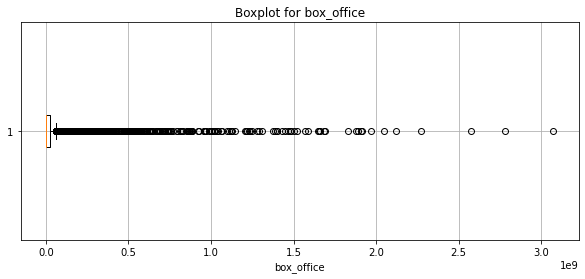

,field,total_values,na,zero,neg,unique,min,max,q1,median,mean,q3,std,left_border,left_number,right_border,right_number
0,box_office,7469,4328,24,0,2921,0.00,3073569024.00,83950.00,2284862.00,76009672.00,23441120.00,240250272.00,100.00,28,1284231680.00,32


In [36]:
# вывод статистики по столбцу box_office
one_parametrs_stats(all_data, 'box_office', show_boxplot=True)

Судя по статистическим данным и диаграмме размаха значения в столбце представлены в разных величинах (в рублях, тысячах рублей, миллионах рублей и т.п.). Посмотрим на строки со сборами менее 1 млн. руб.

In [37]:
# вывод значений box_office менее 1 млн. руб.
without_missing_data.query('box_office <= 1000000').head(20)

,refundable_support,nonrefundable_support,ratings,budget,box_office
1281,0.00,26500000.00,8.10,79411904.00,365353.59
1524,0.00,28000000.00,4.20,40574140.00,55917.50
1792,0.00,25000000.00,6.40,40015120.00,232100.00
1912,0.00,34000000.00,7.40,48571432.00,51907.50
1991,0.00,25000000.00,6.80,36259500.00,554251.00
2106,0.00,25500000.00,6.70,40500000.00,366998.00
2108,0.00,45000000.00,5.00,68490608.00,310738.00
2146,0.00,10000000.00,9.40,40000000.00,334750.00
2166,0.00,24000000.00,6.70,35296952.00,854334.50
2169,0.00,30000000.00,6.10,43000000.00,40050.00


Cудя по данным бюджеты фильмов исчисляются десятками и сотнями миллионов, а вот сборы в некоторых строках недоходят до 10 тысяч рублей. Вероятнее всего в данных ошибка и в столбце box_office данные указаны с неверным порядком цифр после запятой или не в том формате. Умножим все значения менее 1 млн. на 10 и проверим как изменятся статистические данные.
"""
    Функция для масштабирования значений в столбце box_office.
    Значения умножаются на:
    - 1000, если они меньше 10,000.
    - 100, если они меньше 100,000.
    - 10, если они меньше 1,000,000.

In [38]:
# функция для приведения значений столбца к единому исчислению
def update_box_office(all_data, column_name='box_office'):
    all_data.loc[all_data[column_name] < 10000, column_name] *= 1000
    all_data.loc[(all_data[column_name] >= 10001) & (all_data[column_name] < 100000), column_name] *= 100
    all_data.loc[(all_data[column_name] >= 100001) & (all_data[column_name] < 1000000), column_name] *= 10
    all_data.loc[(all_data[column_name] >= 1000001) & (all_data[column_name] < 10000000), column_name] *= 10
    
    return all_data

update_box_office(all_data).head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,is_budget_correct
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,Not applicable
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,Not applicable
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable


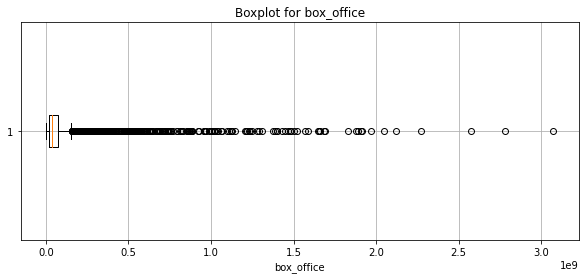

,field,total_values,na,zero,neg,unique,min,max,q1,median,mean,q3,std,left_border,left_number,right_border,right_number
0,box_office,7469,4328,24,0,2878,0.00,3073569024.00,19452700.00,38460928.00,101541072.00,73550000.00,233804592.00,1000000.00,30,1284231680.00,32


In [39]:
# вывод статистики столбца box_office
one_parametrs_stats(all_data, 'box_office', show_boxplot=True)

In [40]:
# вывод количества строк со значением более 1 млрд.
len(all_data.query('box_office > 1000000000'))

54

In [41]:
# вывод количества строк со значениями box_office больше 0
len(all_data.query('box_office > 0'))

3117

В данных 54 строки со значениями в столбце box_office выше 1 млрд руб. Это выбивающиеся значения и так как их менее 2% лучше удалить из выборки чтобы избежать искажения данных при анализе.

In [42]:
# удаление строк со значением box_office более 1 млрд.
all_data = all_data.loc[~(all_data['box_office'] > 1000000000)]

one_parametrs_stats(all_data, 'box_office', show_boxplot=True)

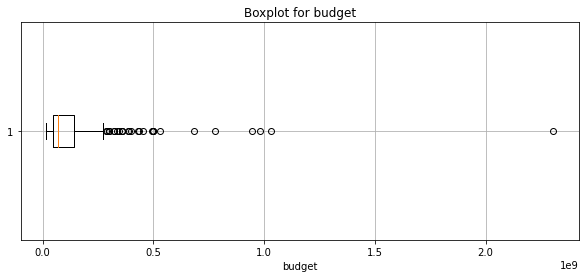

,field,total_values,na,zero,neg,unique,min,max,q1,median,mean,q3,std,left_border,left_number,right_border,right_number
0,budget,7415,7106,0,0,283,14462464.00,2305074176.00,45538656.00,70305000.00,128770048.00,140024992.00,187091376.00,19369594.00,4,930875328.00,4


In [43]:
# вывод статистики столбца budget
one_parametrs_stats(all_data, 'budget', show_boxplot=True)

In [44]:
# вывод количества строк со значением budget более 500 млн.
len(all_data.query('budget >= 500000000'))

9

In [45]:
# вывод количества строк со значением budget более 0
len(all_data.query('budget > 0'))

309

В данных 8 строк, в которых значение столбца budget выше 500 млн. руб. Их 2,7% от общего количества строк с данными о бюджете. Удалим их из выборки чтобы избежать влияния выбросов на результаты исследования.

In [46]:
# удаление строк со значением budget более 500 млн.
all_data = all_data.loc[~(all_data['budget'] > 500000000)]

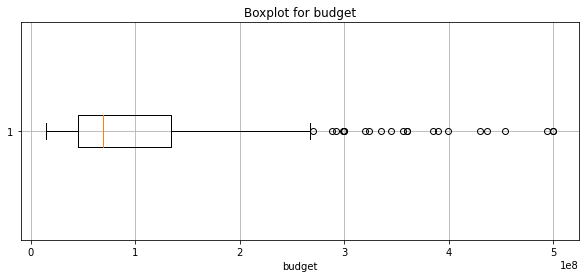

,field,total_values,na,zero,neg,unique,min,max,q1,median,mean,q3,std,left_border,left_number,right_border,right_number
0,budget,7407,7106,0,0,275,14462464.00,500000000.00,45074548.00,69428728.00,106429792.00,134000000.00,94122520.00,18706080.00,3,453704672.00,3


In [47]:
# вывод статистики столбца budget
one_parametrs_stats(all_data, 'budget', show_boxplot=True)

### Изучим дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

#### Неявные дубликаты в столбце production_country

Выше при исследовании пропусков в столбце produser мы выводили уникальные значения столбца production_country и видели там существенное наличие неявных дубликатов. Выведем все уникальные значения столбца production_country.

In [48]:
# вывод остортированных уникальных значений production_country
all_data['production_country'].sort_values().unique()

array(['2019', 'CША', 'Австралия',
       'Австралия - Великобритания - Бельгия - Индия',
       'Австралия - Германия', 'Австралия - Ирландия',
       'Австралия - Колумбия', 'Австралия - США', 'Австралия, Канада',
       'Австралия, США', 'Австралия-Великобритания', 'Австралия-Ирландия',
       'Австралия-США', 'Австралия-Турция-США', 'Австрия',
       'Австрия - Германия', 'Австрия - Германия - Франция',
       'Австрия - Люксембург', 'Австрия, Великобритания, Германия',
       'Австрия-Германия-Франция', 'Австрия-Франция-Германия',
       'Азербайджан-Россия', 'Аргентина', 'Аргентина - Бразилия',
       'Аргентина - Испания', 'Аргентина - Испания - Уругвай',
       'Аргентина - Мексика - Бразилия - Франция - США',
       'Аргентина - Уругвай - Россия - Германия - Франция - Нидерланды',
       'Аргентина - Франция - Испания', 'Аргентина, Испания',
       'Аргентина-Испания', 'Армения', 'Армения - Германия',
       'Армения - Казахстан', 'Армения-Россия', 'Бельгия',
       'Бельгия -

В данных есть различные написания списков стран (например 'СССР, ГДР', 'Россия-Франция', 'Россия - Франция'), различные написания стран (например Корея, Южная Корея, Ю.Корея). Удалим лишние пробелы, приведем все названия стран к нижнему регистру и выполним замену неявных дубликатов.

In [49]:
# приведение к нижнему регистру
all_data['production_country'] = all_data['production_country'].str.lower()

In [50]:
# замена запятых и пробелов на дефисы
all_data['production_country'] = all_data['production_country'].replace({
    r'\s*,\s*': '-',
    r'\s*-\s*': '-'
}, regex=True)

In [51]:
# замена неявных дубликатов
all_data['production_country'] = all_data['production_country'].replace({
    r'\bреспублика кипр\b': 'кипр',
    r'\bю\.корея\b': 'корея', 
    r'\bюжная корея\b': 'корея',
    r'\bчешская республика\b': 'чехия',
    r'\bреспублика \b': '',
    r'\bсща\b': 'сша',
    r'\bн\.зеландия\b': 'новая зеландия'
}, regex=True)

In [52]:
# вывод остортированных уникальных значений production_country
all_data['production_country'].sort_values().unique()

array(['2019', 'cша', 'австралия', 'австралия-великобритания',
       'австралия-великобритания-бельгия-индия', 'австралия-германия',
       'австралия-ирландия', 'австралия-канада', 'австралия-колумбия',
       'австралия-сша', 'австралия-турция-сша', 'австрия',
       'австрия-великобритания-германия', 'австрия-германия',
       'австрия-германия-франция', 'австрия-люксембург',
       'австрия-франция-германия', 'азербайджан-россия', 'аргентина',
       'аргентина-бразилия', 'аргентина-испания',
       'аргентина-испания-уругвай',
       'аргентина-мексика-бразилия-франция-сша',
       'аргентина-уругвай-россия-германия-франция-нидерланды',
       'аргентина-франция-испания', 'армения', 'армения-германия',
       'армения-казахстан', 'армения-россия', 'беларусь',
       'беларусь-германия-сша-россия', 'бельгия',
       'бельгия-великобритания-сша',
       'бельгия-германия-канада-франция-сша-великобритания',
       'бельгия-германия-люксембург',
       'бельгия-германия-люксембург-фр

#### Неявные дубликаты в столбце title

Проверим наличие неявных дубликатов в столбце title. Выведем уникальные значения столбца.

In [53]:
# сортировка и вывод уникальных значений
sorted_unique_title = all_data['title'].sort_values().unique()
unique_titles_list = sorted_unique_title.tolist()
unique_titles_list

['"SOS" над тайгой',
 '"V" значит вендетта',
 '"АРТиШОК" анимационный альманах авторских фильмов',
 '"Бежин луг" Сергея Эйзенштейна',
 '"Державная" Размышления 100 лет спустя',
 '"Зеленое яблоко" анимационный альманах выпуск № 7',
 '"Машины песенки". Серия "Опять Новый Год!"',
 '"Море"',
 '"Сезон дождей", "Диета Матроскина", "Шарик хочет телефон" из анимационного сериала "Простоквашино"',
 '"Старый" Новый год',
 '"Уорнер Бразерс Пикчерз" и "Леджендари Пикчерз": Тихоокеанский рубеж',
 '"Фееринки". Серия "Фантик спешит на помощь"',
 '"Хороший день", "Бог из машины/Deus EX", "Голод", "Психотроника", "Темная ночь"',
 '"Чудовище из Простоквашино", "Ген героя", "Ненастоящий детектив", "Мама и Тама", "Как бы не стало зимы" из анимационного сериала "Простоквашино"',
 '#ВСЁ_ИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '... в стиле JAZZ',
 '... и я там был',
 '... имени Сергея Герасимова',
 '007 Координаты Скайфолл',
 '007

В значениях столбца довольно много символов, которые могут привести к появлению дубликатов. Удалим из значений кавычки, двоеточия, обратные наклонные черты, точки и т.п.

In [54]:
# предобработка данных: нормализация названий киностудий
def normalize_studio(studio):
    if isinstance(studio, str):        
        studio = studio.replace('"', '') # Удаляем кавычки
        studio = studio.replace("'", '') # Удаляем одиночные кавычки
        studio = studio.replace(" - ", '-') # Заменяем дефисы с пробелами на дефисы
        studio = studio.replace(": ", ' ') # Заменяем двоеточия на пробелы
        studio = studio.replace("\\", ' ') # Заменяем обратные косые черты на пробелы
        studio = studio.replace("_", '') # удаляем нижние подчеркивания
        studio = studio.replace(".", '') # удаляем точки
        studio = studio.strip() # удаляем появивишиеся лишние пробелы
    return studio

# применяем нормализацию к столбцу
all_data['title'] = all_data['title'].apply(normalize_studio)


In [55]:
# cортировка и вывод уникальных значений
sorted_unique_title = all_data['title'].sort_values().unique()
unique_titles_list = sorted_unique_title.tolist()
unique_titles_list

['#ВСЁИСПРАВИТЬ!?!',
 '#Москва-Руаян',
 '#ЯВОЛОНТЕР Истории неравнодушных',
 '(Не)жданный принц',
 '(Не)идеальный мужчина',
 '007 Координаты Скайфолл',
 '007 Спектр',
 '1+1',
 '1+1 Голливудская история',
 '1+1 Нарушая правила',
 '10 000 км Любовь на расстоянии',
 '10 000 лет до нэ',
 '10 лет спустя',
 '10 мгновений судьбы',
 '100 вещей и ничего лишнего',
 '100 лет Чувашской автономии',
 '100 лет дизайна',
 '100 миллионов евро',
 '1001 рецепт влюбленного кулинара',
 '11 минут',
 '11-11-11',
 '118 секунд, до и после',
 '12 лет рабства',
 '12 мелодий любви',
 '12 месяцев',
 '12 месяцев Новая сказка',
 '120/80',
 '127 часов',
 '128 ударов сердца в минуту',
 '13',
 '13 грехов',
 '13 убийц',
 '13 часов Тайные солдаты Бенгази',
 '13-й район Кирпичные особняки',
 '1408 /По рассказу Стивена Кинга/',
 '1812 Уланская баллада',
 '1915',
 '1937 Время смерти (Судоходное кладбище, Трагедия праздника)',
 '2 + 2',
 '2 спальни, 1 ванная',
 '2+1',
 '20 000 дней на Земле',
 '2001 год Космическая одиссея',

#### Неявные дубликаты в столбце type

In [56]:
# вывод остортированных уникальных значений type
all_data['type'].sort_values().unique()

array(['Анимационный', 'Документальный', 'Музыкально-развлекательный',
       'Научно-популярный', 'Прочие', 'Художественный'], dtype=object)

В данном столбце дубликатов и проблем со значениями нет.

#### Неявные дубликаты в столбце film_studio

In [57]:
# cортировка и вывод уникальных значений
sorted_unique_title = all_data['film_studio'].sort_values().unique()
unique_titles_list = sorted_unique_title.tolist()
unique_titles_list

['"Дино де Лаурентиис" (Италия) при участии Киностудии "Мосфильм"',
 '"Союздетфильм", "Мосфильм", "Москинокомбинат"',
 '"Студия "Птица Феникс" Татьяны Новиковой',
 '"Эскиз и Каргин Студио"',
 '02 Филмз, Ромбэс Медиа',
 '100 Барес, 369 Продюксьонес, Антен 3 Фильм, Катманду Брендид Интертейнмент, Плюраль - Джемпса, Прана Анимейшн Студиос, Телевизион Федераль',
 '100 Барес, Институто Националь де Сине и Артс Аудивизуалес, Институто де ла Синематографиа и де ла Артс Аудивизуалес, Министеро де Култура, Телевизион Федераль, Торнасол Фильм',
 '100 Барс, Канал + Испания, Хаддок Фильм, Институто Националь Сине Арте Аудивизуаль, Институто де Кредито Офисиаль, Телевидение Испании, Федеральное Телевидение, Торнасол Филмз',
 '1000 Айз, Брон Криэйтив Студиос, Нью Лайн Синема',
 '1212 Интертейнмент, Си Би Эс Филмз, Ди Ди Уай, Интертейнмент Уан, Шон Дэниэл Компани',
 '1492 Пиксерз, Коламбиа Пикчерз, Хэппи Медисон Пикчерз',
 '1492 Пикчерз, Фокс 2000 Пикчерз, Импринт Интертейнмент, ХХ век Фокс',
 '16:14

В данных о киностудиях болльшое количество неявных дубликатов (различные вариации написания названий или части названий студий). Обработка всех неявных дублей потребует много усилий и времени. Однако, так как эти данные не участвуют в дальнейшем анализе, то нет смысла обрабатывать эти дубли. Оставим значения как есть.

#### Неявные дубликаты в столбце director

In [58]:
# сортировка и вывод уникальных значений
sorted_unique_director = all_data['director'].sort_values().unique()
unique_director_list = sorted_unique_director.tolist()
unique_director_list

['Ёлкин Туйчиев',
 'Ён Сан-хо',
 'А Андрющенко',
 'А. Калюжный',
 'А. Кутерье',
 'А.А.Эшпай',
 'А.Аббасов',
 'А.Абидова (псевдоним Аниса Сабири)',
 'А.Аболс',
 'А.Агаджанян',
 'А.Адилханян',
 'А.Адраникян',
 'А.Аксененко',
 'А.Аксененко, Э.Никогосян, Д.Дюжев, А.Вакулов (А.Кульбицкий)',
 'А.Алов, В.Наумов',
 'А.Аманшаев, Г.Шенгелия',
 'А.Амбросьев',
 'А.Амиров',
 'А.Ананикян, В.Рейнгеверц',
 'А.Андрианов',
 'А.Андризани, А.Бардани, В.Карнелутти, Ф.Коста,  Г.С.Нардис, В.Пальмьери, В.Чеа, А.Юлиано',
 'А.Анненский',
 'А.Аравин',
 'А.Аравин, А.Прошкин',
 'А.Арпеньтеньер, А.Бариларо, М.Бланчес, Р.Валлей, Л.Гранд, Ф.Дион, А.Жасина, Э.Коэтс,  Лу Хаму-Лхад, П.Осборн, Т.Ушев',
 'А.Артамонова',
 'А.Арутюнов',
 'А.Арутюнян, А.Коршунов',
 'А.Атанесян',
 'А.Бадягина',
 'А.Бажанов',
 'А.Балабанов',
 'А.Балахонов',
 'А.Бальчев',
 'А.Баранов',
 'А.Баршак',
 'А.Барщевский, И.Матвеев',
 'А.Барыкин',
 'А.Басаев',
 'А.Басов',
 'А.Безрук',
 'А.Беляев',
 'А.Берденников',
 'А.Бзаров',
 'А.Бильжо',
 'А.Бобров'

На первый взгляд проблем со значениями столбца нет. Детальное изучение и обработка всех неявных дублей потребует много усилий и времени. Однако, так как эти данные не участвуют в дальнейшем анализе, то нет смысла искать и обрабатывать дубли.

#### Проверка на явные дубликаты

Главным критерием отличия в записях о произведениях является поле puNumber, которое содержит уникальный номер прокатного удостоверения. Проверим наличие явных дубликатов по этому столбцу.

In [59]:
# проверка на наличие строк-дубликатов
all_data['puNumber'].duplicated().sum()

2

Таких строк всего 2. Удалим дубликаты из выборки.

In [60]:
# удаление строк-дубликатов
all_data = all_data.drop_duplicates()

### Добавим новые столбцы

#### Столбец с годом выхода

- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [61]:
# добавление в таблицу столбца с годом проката
all_data['show_start_date'] = pd.to_datetime(all_data['show_start_date'], format='%Y-%m-%dT%H:%M:%S')
all_data['show_start_year'] = all_data['show_start_date'].dt.year

#### Столбцы с главным режисером и основным жанром

- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_2" aria-expanded="false" aria-controls="collapseHint_2">Подсказка</button>
        </div>
        <div id="collapseHint_2" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Чтобы создать такие столбцы, лучше всего использовать собственную функцию. Эту функцию можно применить к двум столбцам сразу. 
            </div>
        </div>
    </div>
</div>

In [62]:
# определение функции для извлечения первого элемента из списка
def extract_first_item(column_value):
    if isinstance(column_value, str):
        return column_value.split(',')[0].strip()
    return column_value

# применение функции к столбцу directors для извлечения первого режиссёра
all_data['first_director'] = all_data['director'].apply(extract_first_item)

# применение функции к столбцу genres для извлечения первого жанра
all_data['first_genre'] = all_data['genres'].apply(extract_first_item)

#### Столбец с долей гос. поддержки от общего бюджета

- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [63]:
# рассчет доли гос. поддержки от общего бюджета
all_data['total_support'] = all_data['refundable_support'] + all_data['nonrefundable_support']
all_data['gov_budget_rate'] = all_data['total_support'] / all_data['budget']

Проверим добавление новых столбцов.

In [64]:
# вывод первых 5 строк
all_data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,is_budget_correct,show_start_year,first_director,first_genre,total_support,gov_budget_rate
0,Открытый простор,221048915,2015-11-27 12:00:00+00:00,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикчерз, Тиг Продакшнз",сша,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.20,"боевик,драма,мелодрама",NaN,Not applicable,2015,Кевин Костнер,боевик,NaN,NaN
1,Особо важное задание,111013716,2016-09-13 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",ссср,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.60,"драма,военный",NaN,Not applicable,2016,Е.Матвеев,драма,NaN,NaN
2,Особо опасен,221038416,2016-10-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable,2016,Тимур Бекмамбетов,фантастика,NaN,NaN
3,Особо опасен,221026916,2016-06-10 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable,2016,Тимур Бекмамбетов,фантастика,NaN,NaN
4,Особо опасен,221030815,2015-07-29 12:00:00+00:00,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Платт Продакшнз, Рилейтивити Медиа, Спайгласс Интертейнмент, Стилкин Филмз, Топ Кау Продакшнз",сша,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.80,"фантастика,боевик,триллер",NaN,Not applicable,2015,Тимур Бекмамбетов,фантастика,NaN,NaN


<div class="alert alert-info">В процессе предобработки данных были выявлены пропуски и аномальные значения, в основном касающиеся данных о финансовых показателях фильмов. Были удалены лишние пробелы в строках, приведены к единому виду данные о сборах, а также устранены неявные дубликаты в наименованиях стран. Некоторые аномальные значения в финансовых данных были исключены, чтобы не исказить результаты анализа. Несмотря на наличие пропусков в данных о государственной поддержке, они были оставлены без изменений, так как их отсутствие может отражать отсутствие поддержки. Также в данные были добавлены новые столбцы для дальнейшего анализа.</div>
    
<div class="alert alert-info">Предобработка данных является важным шагом, так как она помогает устранить ошибки и неточности, которые могут исказить результаты исследования. Приведение данных к единому формату также упрощает дальнейшую работу и обработку данных.</div>

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Не хватает тут промежуточного вывода по итогу предобработки данных  

## Исследовательский анализ данных

- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах. Проанализируйте, как эта доля менялась по годам. Сделайте вывод о том, какой период полнее всего представлен в данных.

### Динамика выхода фильмов по годам

Для анализа динамики количества фильмов, вышедших в прокат и доли этих фильмов от общего, нам нужно собрать данные в определенных разбивках. Соберем сводные таблица с общим количеством фильмов и количеством фильмов, вышедших в прокат, объединим их в одну таблицу и добавим столбец с расчетом доли фильмов в прокате от общего количества фильмов.

In [65]:
# создание сводной таблицы с подсчетом общего количества фильмов по годам
film_per_year = all_data.pivot_table(index='show_start_year', values='puNumber', aggfunc='count')

In [66]:
# создание сводной таблицы с количеством фильмов, вышедших в прокат по годам
filtered_data = (all_data.dropna(subset=['box_office'])
                 .pivot_table(index='show_start_year', values='puNumber', aggfunc='count'))

In [67]:
# объединенние сводных таблиц с общим количеством фильмов и фильмов, вышедших в прокат
film_per_year_data = pd.merge(film_per_year, filtered_data, on='show_start_year', how='left')
film_per_year_data.columns = ('all_films', 'box_office_films')
film_per_year_data

,all_films,box_office_films
show_start_year,,
2010,985,105
2011,622,109
2012,593,128
2013,630,184
2014,805,277
2015,691,451
2016,804,512
2017,490,342
2018,876,460


In [68]:
# добавление столбца с долей фильмов, вышедших в прокат от общего количества фильмов
film_per_year_data['box_office_rate'] = film_per_year_data['box_office_films'] / film_per_year_data['all_films']
film_per_year_data

,all_films,box_office_films,box_office_rate
show_start_year,,,
2010,985,105,0.11
2011,622,109,0.18
2012,593,128,0.22
2013,630,184,0.29
2014,805,277,0.34
2015,691,451,0.65
2016,804,512,0.64
2017,490,342,0.70
2018,876,460,0.53


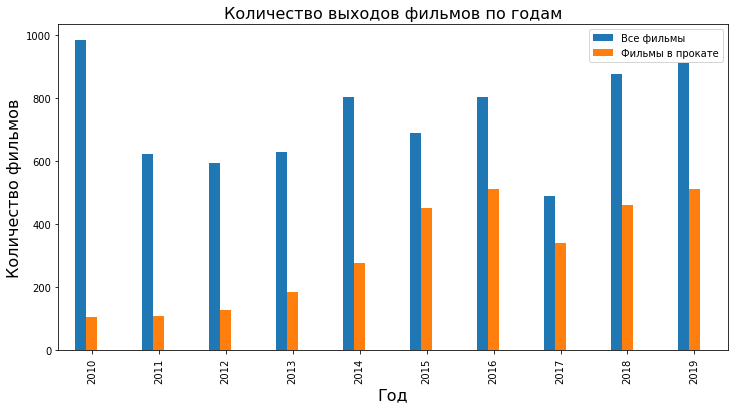

In [69]:
# вывод графика с динамикой по годам общего количества и вышедших в прокат фильмов
fig, ax = plt.subplots(figsize=(12, 6))
film_per_year_data.plot(kind='bar', ax=ax)

ax.set_title('Количество выходов фильмов по годам', fontsize = 16)
ax.set_ylabel('Количество фильмов', fontsize = 16)
ax.set_xlabel('Год', fontsize = 16)
ax.legend(labels=['Все фильмы', 'Фильмы в прокате'])

plt.show()

По графику видно, что наибольшее количество всех фильмов (показано синим цветом) было выпущено в 2010 году, после чего количество несколько сократилось, а затем вновь увеличилось к 2019 году. Количество фильмов, которые были выпущены в прокат (показано оранжевым цветом), демонстрирует восходящую тенденцию в период с 2010 по 2019 годы. Наименьшее количество фильмов в прокате было в 2010 году, а с каждым последующим годом оно постепенно увеличивалось, достигнув пика в 2019 году.

Для обоих графиков видно падение в 2017 году, более ярко выраженное в общем количестве фильмов. Это могло быть обусловено различными факторами, имеющими влияние на киноиндустрию в стране и в мире.

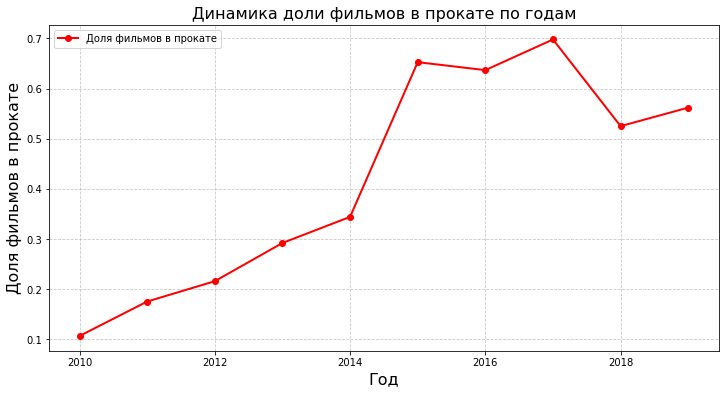

In [70]:
#построение графика динамики доли фильмов вышедших в прокат по годам
fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(film_per_year_data.index, film_per_year_data['box_office_rate'], color='red', marker='o', linestyle='-', linewidth=2, label='Доля фильмов в прокате')

ax.set_title("Динамика доли фильмов в прокате по годам", fontsize=16)
ax.set_ylabel("Доля фильмов в прокате", fontsize=16)
ax.set_xlabel("Год", fontsize=16)
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(loc='upper left')

plt.show()


Доля фильмов, вышедших в прокат, по сравнению с общим количеством выпущенных фильмов, увеличивалась в течение рассматриваемого периода. Наибольшая доля фильмов в прокате зафиксирована в 2017 году. Однако нужно помнить что в количественном выражении в этот год наблюдалось снижение как общего количества фильмов, так и количества фильмов в прокате.
Хотя общее количество фильмов не сильно изменилось, увеличение доли фильмов в прокате может указывать на улучшение качества фильмов или изменение стратегий проката, приводящих к большему числу фильмов, попадающих на экраны. Также это может быть обусловлено более полным представлением данных о прокате за период 2015-2019 г.

### Динамика сборов по годам

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

In [71]:
# создание сводной таблицы с суммами сборов по годам
all_data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')

,box_office
show_start_year,
2010,3504387072.00
2011,4469223936.00
2012,4710722048.00
2013,6406177792.00
2014,14862260224.00
2015,38411366400.00
2016,43926196224.00
2017,38580146176.00
2018,42538123264.00


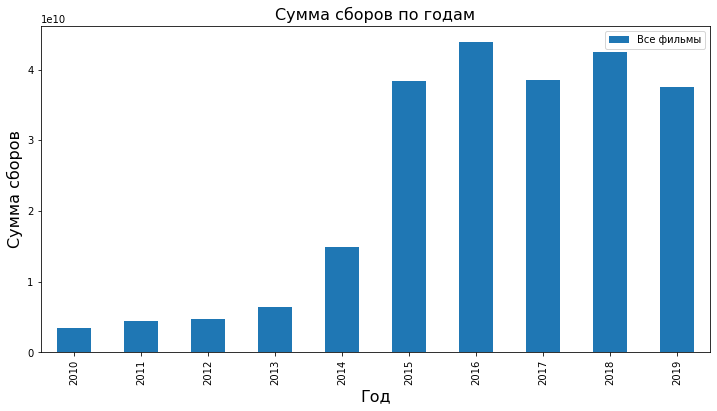

In [72]:
# вывод графика с динамикой сумм сборов по годам
fig, ax = plt.subplots(figsize=(12, 6))
(
    all_data.pivot_table(index='show_start_year', values='box_office', aggfunc='sum')
    .plot(kind='bar', ax=ax)
)

ax.set_title('Сумма сборов по годам', fontsize = 16)
ax.set_ylabel('Сумма сборов', fontsize = 16)
ax.set_xlabel('Год', fontsize = 16)
ax.legend(labels=['Все фильмы', 'Фильмы в прокате'])

plt.show()

Динамика общей суммы сборов по годам аналогична динамике количества фильмов в прокате. Посмотрим как менялись медианные и средние значения ежегодных сборов.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [73]:
# создание сводной таблицы со средним и медианным значением сборов по годам
all_data.pivot_table(index='show_start_year', values='box_office', aggfunc=('mean', 'median'))

,mean,median
show_start_year,,
2010,33375116.00,26500000.00
2011,41002056.00,36430000.00
2012,36802516.00,28097500.00
2013,34816184.00,29450000.00
2014,53654368.00,28485500.00
2015,85169320.00,40118644.00
2016,85793352.00,39737812.00
2017,112807440.00,43427248.00
2018,92474184.00,41738392.00


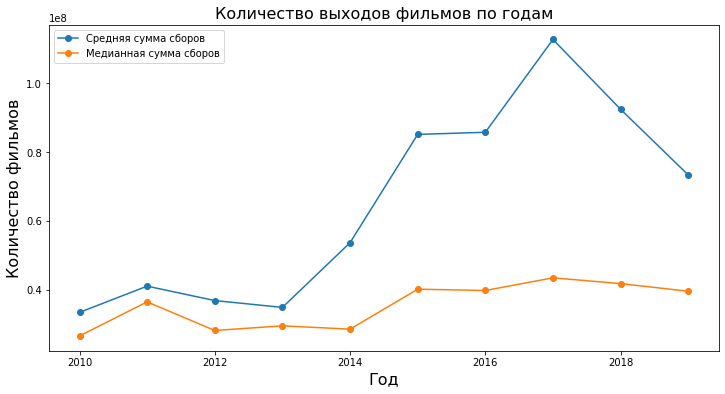

In [74]:
# вывод графика с медианным и средним значением по годам
fig, ax = plt.subplots(figsize=(12, 6))

(
    all_data.pivot_table(index='show_start_year', values='box_office', aggfunc=('mean', 'median'))
    .plot(kind='line', marker='o', ax=ax)
)

ax.set_title('Количество выходов фильмов по годам', fontsize = 16)
ax.set_ylabel('Количество фильмов', fontsize = 16)
ax.set_xlabel('Год', fontsize = 16)
ax.legend(labels=['Средняя сумма сборов', 'Медианная сумма сборов'])

plt.show()

Средняя сумма сборов (синяя линия) показывает значительные колебания с тенденцией к росту до 2017 года, после чего наблюдается снижение. Медианная сумма сборов (оранжевая линия) остаётся относительно стабильной на протяжении всего периода, с незначительными колебаниями.

Существенная разница между средней и медианной суммой сборов указывает на наличие фильмов с очень высокими сборами, которые сильно влияют на среднее значение. 

Начиная с 2017 года, наблюдается спад средней суммы сборов, что может указывать на снижение кассовых сборов некоторых фильмов. Медианная сумма сборов остаётся стабильной, что может указывать на то, что большинство фильмов имеют относительно неизменные сборы, несмотря на изменения в средней сумме.

Таким образом, можно сделать вывод, что в период с 2010 по 2019 годы средняя сумма сборов фильмов значительно колебалась, достигая пика в 2017 году, а затем начала снижаться. Медианная сумма сборов остаётся более стабильной, указывая на устойчивость сборов большинства фильмов. Большие различия между средней и медианной суммами сборов указывают на наличие отдельных фильмов с очень высокими сборами, которые сильно влияют на средние значения.

### Влияние возрастных ограничений на сумму сборов

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

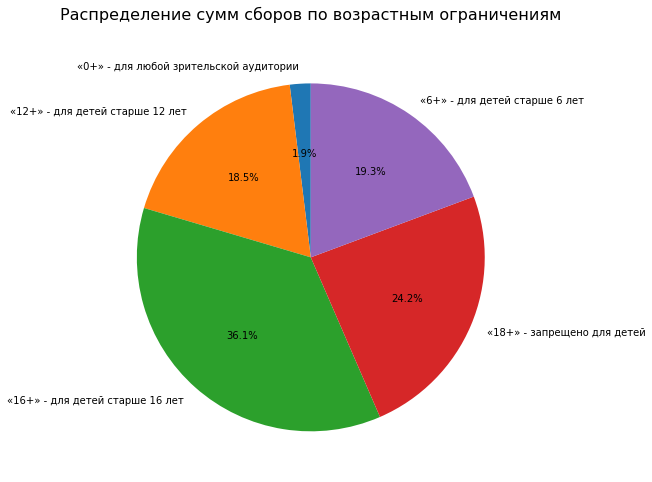

In [75]:
# фильтрация данных только за 2015-2019 года
filtered = all_data.loc[(all_data['show_start_year'] >= 2015) & 
                                  (all_data['show_start_year'] <= 2019)]

# Группировка данных по возрастным ограничениям и суммирование box_office
grouped_data = filtered.groupby('age_restriction')['box_office'].sum()

# Построение круговой диаграммы
fig, ax = plt.subplots(figsize=(8, 8))
grouped_data.plot(kind='pie', ax=ax, autopct='%1.1f%%', startangle=90)

# Настройка заголовка и подписей осей
ax.set_title('Распределение сумм сборов по возрастным ограничениям', pad=20, fontsize=16)
ax.set_ylabel('')
ax.set_xlabel('')


# Отображение диаграммы
plt.show()


In [76]:
# создание сводной таблицы с данными о сборах в разбивке по возрастным ограничениям
filtered_data = filtered.pivot_table(index='age_restriction',
                                   values='box_office',
                                   aggfunc=('sum', 'mean', 'count'))
filtered_data

,count,mean,sum
age_restriction,,,
«0+» - для любой зрительской аудитории,91,42810652.00,3895769344.00
«12+» - для детей старше 12 лет,323,115028688.00,37154263040.00
«16+» - для детей старше 16 лет,784,92544704.00,72555044864.00
«18+» - запрещено для детей,783,62044816.00,48581091328.00
«6+» - для детей старше 6 лет,296,131208064.00,38837587968.00


Категория «16+» имеет наибольшую долю от общей суммы сборов, составляя 35.2%. Категория «18+» занимает второе место по сумме сборов с долей 22.9%. Категория «12+» также занимает значительную часть рынка с долей 19.4%. Это указывает что наибольшая доля фильмов в прокате рассчитана на взрослую аудиторию. 

Фильмы для категорий «0+» и «6+» в прокате представлены небольшим количеством, но имеют довольно крупные суммы сборов. Наибольшее среднее значение сборов у фильмов в категории «6+». Это указывает на то, что в данной категории есть фильмы со сборами гораздо выше, чем у фильмов других категорий. 

Так же достаточно высокие средние суммы сборов у фильмов категорий «12+» и «16+». Это указывает на то, что чем шире аудитория просмотра фильма, тем более крупные сборы он может сделать. 

Для фильмов категории «0+» наблюдаются нименьшие суммы сборов и количество фильмов в прокате. Вероятно это связано со спецификой целевой аудитории. Обычно в эту категорию входят фильмы и мультфильмы рассчитанные на маленьких детей и/или семейный просмотр.

Посмотрим как менялась динамика сборов в разрезе возрастных ограничений по годам в период с 2015 по 2019 г.

In [77]:
# создание сводной таблицы с данными о сборах в разбивке по возрастным ограничениям
filtered_data = filtered.pivot_table(index=('show_start_year', 'age_restriction'),
                                   values='box_office',
                                   aggfunc=('sum', 'mean', 'count'))
filtered_data

count         mean  \
show_start_year age_restriction                                              
2015            «0+» - для любой зрительской аудитории     39  40363416.00   
                «12+» - для детей старше 12 лет            68 136905136.00   
                «16+» - для детей старше 16 лет           164  80333128.00   
                «18+» - запрещено для детей               130  58337076.00   
                «6+» - для детей старше 6 лет              50 135383808.00   
2016            «0+» - для любой зрительской аудитории     41  41560044.00   
                «12+» - для детей старше 12 лет            76 106254776.00   
                «16+» - для детей старше 16 лет           178  97063136.00   
                «18+» - запрещено для детей               150  56715120.00   
                «6+» - для детей старше 6 лет              67 124811432.00   
2017            «0+» - для любой зрительской аудитории      3 107611984.00   
                «12+» - для детей старше 12 лет            38 129903032.00   
                «16+» - для детей старше 16 лет           115 128182944.00   
                «18+» - запрещено для детей               146  81627728.00   
                «6+» - для детей старше 6 лет              40 166557664.00   
2018            «0+» - для любой зрительской аудитории      5  32232874.00   
                «12+» - для детей старше 12 лет            62 131009584.00   
                «16+» - для детей старше 16 лет           152  92717976.00   
                «18+» - запрещено для детей               177  57064656.00   
                «6+» - для детей старше 6 лет              64 157199840.00   
2019            «0+» - для любой зрительской аудитории      3  44544660.00   
                «12+» - для детей старше 12 лет            79  84942320.00   
                «16+» - для детей старше 16 лет           175  75822880.00   
                «18+» - запрещено для детей               180  58177284.00   
                «6+» - для детей старше 6 лет              75  93105800.00   

                                                                  sum  
show_start_year age_restriction                                        
2015            «0+» - для любой зрительской аудитории  1574173312.00  
                «12+» - для детей старше 12 лет         9309549568.00  
                «16+» - для детей старше 16 лет        13174632448.00  
                «18+» - запрещено для детей             7583819776.00  
                «6+» - для детей старше 6 лет           6769189888.00  
2016            «0+» - для любой зрительской аудитории  1703961728.00  
                «12+» - для детей старше 12 лет         8075363328.00  
                «16+» - для детей старше 16 лет        17277239296.00  
                «18+» - запрещено для детей             8507267584.00  
                «6+» - для детей старше 6 лет           8362365952.00  
2017            «0+» - для любой зрительской аудитории   322835936.00  
                «12+» - для детей старше 12 лет         4936315392.00  
                «16+» - для детей старше 16 лет        14741039104.00  
                «18+» - запрещено для детей            11917648896.00  
                «6+» - для детей старше 6 лет           6662306816.00  
2018            «0+» - для любой зрительской аудитории   161164368.00  
                «12+» - для детей старше 12 лет         8122594304.00  
                «16+» - для детей старше 16 лет        14093132800.00  
                «18+» - запрещено для детей            10100444160.00  
                «6+» - для детей старше 6 лет          10060789760.00  
2019            «0+» - для любой зрительской аудитории   133633976.00  
                «12+» - для детей старше 12 лет         6710443008.00  
                «16+» - для детей старше 16 лет        13269004288.00  
                «18+» - запрещено для детей            10471911424.00  
                «6+» - для детей старше 6 лет           6982934528.00

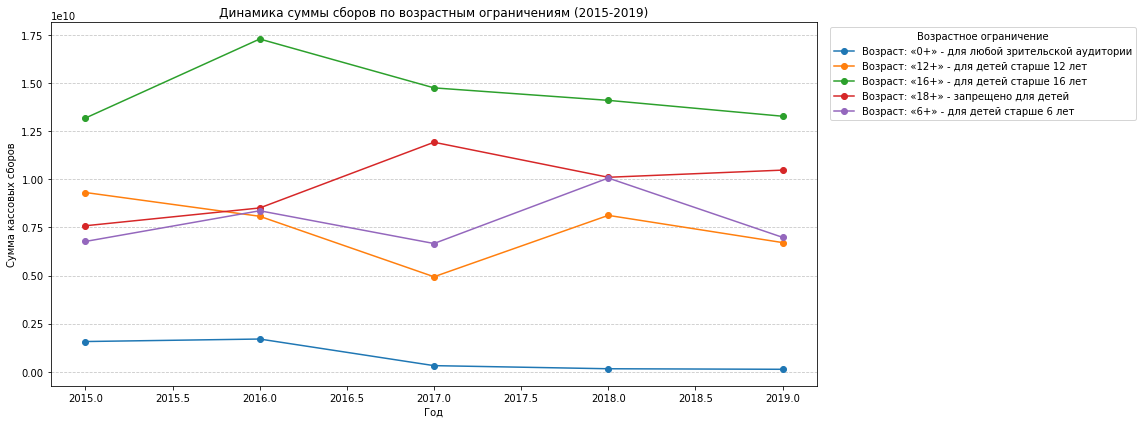

In [78]:
# группировка данных по возрастным ограничениям и годам
age_group_data = filtered_data.groupby(['show_start_year', 'age_restriction']).sum()

# сброс индекса
age_group_data_reset = age_group_data.reset_index()

# уникальные возрастные ограничения
age_restrictions = age_group_data_reset['age_restriction'].unique()

# построение графика по суммам сборов
plt.figure(figsize=(16, 6))
for age in age_restrictions:
    data = age_group_data_reset[age_group_data_reset['age_restriction'] == age]
    plt.plot(data['show_start_year'], data['sum'], marker='o', label=f'Возраст: {age}')

plt.xlabel('Год')
plt.ylabel('Сумма кассовых сборов')
plt.title('Динамика суммы сборов по возрастным ограничениям (2015-2019)')
plt.legend(title='Возрастное ограничение', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


По данным графика можно сделать следующие выводы:
- фильмы с ограничением "6+" и "12+" имеют схожую динамику и тенденцию к росту в 2017 и снижение в 2018 годах;
- фильмы с ограничением "18+" показывают тенденцию к росту с 2015 по 2017 год, небольшое снижение к 2018 и остаются стабильны по суммам сборов;
- фильмы с ограничением "16+" показывают тенденцию к снижению с 2016 года;
- фильмы с ограничением "0+" показывают снижение сборов в 2016 и с 2017 остаются стабильными.

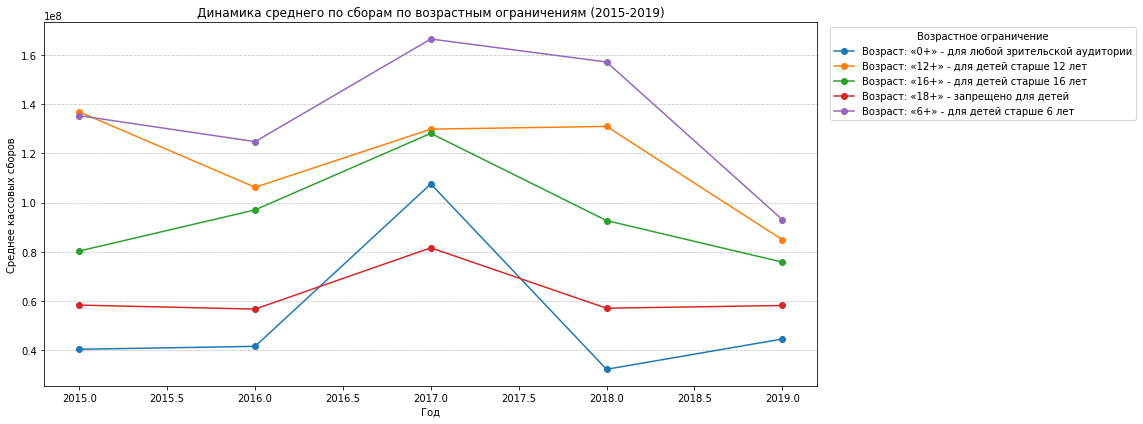

In [79]:
# построение графика среднему значению сборов
plt.figure(figsize=(16, 6))
for age in age_restrictions:
    data = age_group_data_reset[age_group_data_reset['age_restriction'] == age]
    plt.plot(data['show_start_year'], data['mean'], marker='o', label=f'Возраст: {age}')

plt.xlabel('Год')
plt.ylabel('Среднее кассовых сборов')
plt.title('Динамика среднего по сборам по возрастным ограничениям (2015-2019)')
plt.legend(title='Возрастное ограничение', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


По данным графика можно сделать следующие выводы:
- фильмы с ограничением "6+" и "12+" имеют схожую динамику средних сборов;
- фильмы с ограничением "18+" показывают небольшой рост средних значений в 2017 году, но в целом остаются стабильны на протяжении всего периода;
- фильмы с ограничением "16+" показывают рост средних сборов к 2017 году и снижение к 2019 году;
- фильмы с ограничением "0+" показывают пик средних сборов в 2017 году и после возвращение с стабильным значениям. Это может свидетельствовать о выходе в этот период фильма с большими кассовыми сборами или ниличие выброса в данных.

Для трех основных категорий фильмов наблюдается снижение средних сборов в 2019. Это может указывать что в выборке данные за неполный 2019 год и некоторые фильмы еще не успели собрать кассу.

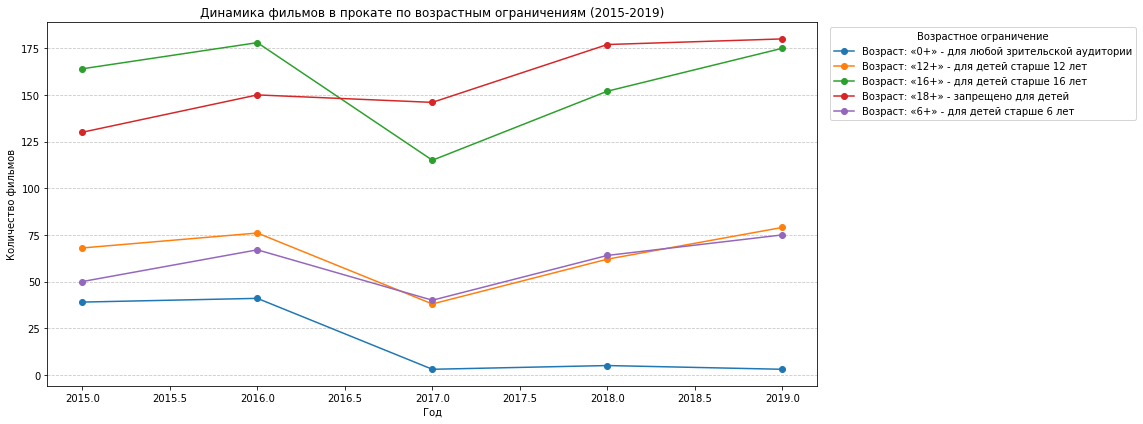

In [80]:
# построение графика по количеству фильмов в прокате
plt.figure(figsize=(16, 6))
for age in age_restrictions:
    data = age_group_data_reset[age_group_data_reset['age_restriction'] == age]
    plt.plot(data['show_start_year'], data['count'], marker='o', label=f'Возраст: {age}')

plt.xlabel('Год')
plt.ylabel('Количество фильмов')
plt.title('Динамика фильмов в прокате по возрастным ограничениям (2015-2019)')
plt.legend(title='Возрастное ограничение', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


По данным графика можно сделать вывод что с 2017 года наблюдается тенденция к росту количества фильмов в прокате для всех возрастных ограничений, кроме "0+". В данной категории после снижения в 2017 количество фильмов в прокате остается стабильным. 

Исходя из всего вышесказанного можно сделать вывод что в прокате лидирующие позиции по количеству фильмов и суммам сборов занимают фильмы с ограничением "16+" и "18+". Однако наиболее высокие средние значения сборов у фильмов категорий "12+" и "6+".

### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

Проанализируем фильмы с гос. поддержкой. Так как гос. поддержку получают только фильмы, в съемках которых учствовала Россия, отфильтруем данные по фильмам для которых в значени столбца production_country указана Россия (одна или в составе списка стран). Далее подсчитаем количество фильмов с гос. поддержкой и проанализируем их окупаемость и популярность.

In [81]:
# добавление столбца с общей суммой гос. поддержки
all_data['all_supported'] = all_data['refundable_support'] + all_data['nonrefundable_support']

In [82]:
# создание сводной таблицы с данными оо б
all_data.pivot_table(index='show_start_year', values='all_supported', aggfunc=('count','sum'))

,count,sum
show_start_year,,
2010,0,0.00
2011,0,0.00
2012,0,0.00
2013,2,134347936.00
2014,15,549002304.00
2015,80,3227241472.00
2016,56,3085050880.00
2017,34,1698971648.00
2018,50,2832999936.00


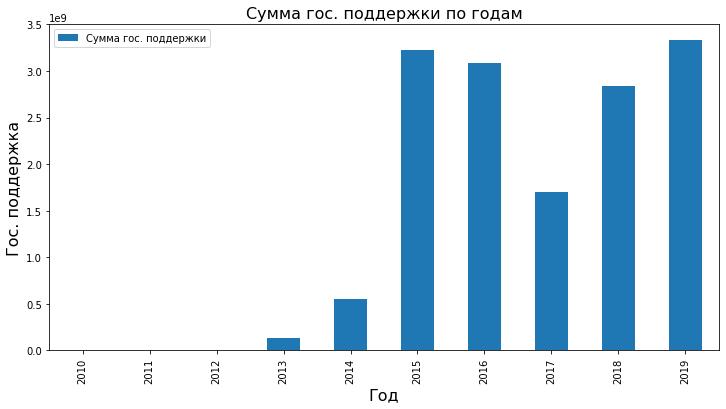

In [83]:
# вывод графика с динамикой сумм гос. поддержки по годам
fig, ax = plt.subplots(figsize=(12, 6))
(
    all_data.pivot_table(index='show_start_year', values='all_supported', aggfunc='sum')
    .plot(kind='bar', ax=ax)
)

ax.set_title('Сумма гос. поддержки по годам', fontsize = 16)
ax.set_ylabel('Гос. поддержка', fontsize = 16)
ax.set_xlabel('Год', fontsize = 16)
ax.legend(labels=['Сумма гос. поддержки'])

plt.show()

По данным видно что гос. поддержку для фильмов в выборке начали выделять с 2013-2014 годов. Наибольшее количество фильмов получивших гос. поддержку было выпущено в 2015 году. Наибольшее количество фильмов с гос. поддержкой было зафиксировано в 2015 году. Наибольшую сумму на гос. поддержку кино выделяли в 2015 и 2019 годах.

Проверим какой рейтинг у фильмов, снятых при участии гос.поддержки.

In [84]:
# функция добавления столбца с категорий фильма по гос. поддержке
def supported_or_not(row):
    
    if row['refundable_support'] > 0 or row['nonrefundable_support'] > 0:
        return 'Supported'
    else:
        return 'Non supported'

all_data['is_supported'] = all_data.apply(supported_or_not, axis=1)

In [85]:
# отфильтруем данные токлько по фильмам с гос.поддержкой
supported_films = all_data.loc[all_data['is_supported'] == 'Supported']

array([[<AxesSubplot:title={'center':'ratings'}>]], dtype=object)

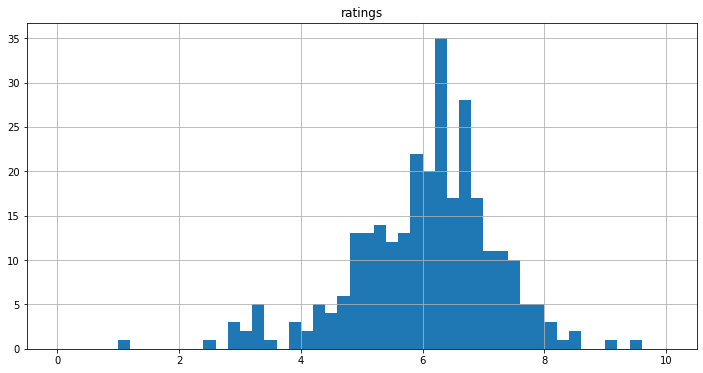

In [86]:
# вывод гистограммы с рейтингом фильмов с гос. поддержкой
(
    supported_films.pivot_table(index='puNumber', values='ratings', aggfunc='median')
    .hist(bins=50, range=(0,10), figsize=(12,6))
)


Оценки большинства фильмов с гос. поддержкой находятся в диапазоне от 5 до 7-7.5. Это значить что большая часть фильмов с участием гос. поддержки получает хорошие оценки в рейтингах.

Проверим как окупаются фильмы с гос. поддержкой.

In [87]:
supported_payback_data = supported_films.pivot_table(index='show_start_year', 
                                                     values=['budget', 'box_office', 'all_supported'], 
                                                     aggfunc='sum')
supported_payback_data

,all_supported,box_office,budget
show_start_year,,,
2013,134347936.00,56492392.00,255435392.00
2014,549002304.00,1462495488.00,1279484800.00
2015,3227241472.00,6448311296.00,7309669376.00
2016,3085050880.00,4468340736.00,5909458432.00
2017,1698971648.00,5214886400.00,3968142080.00
2018,2832999936.00,6605452800.00,5939324416.00
2019,3334000128.00,5091716608.00,7373850112.00


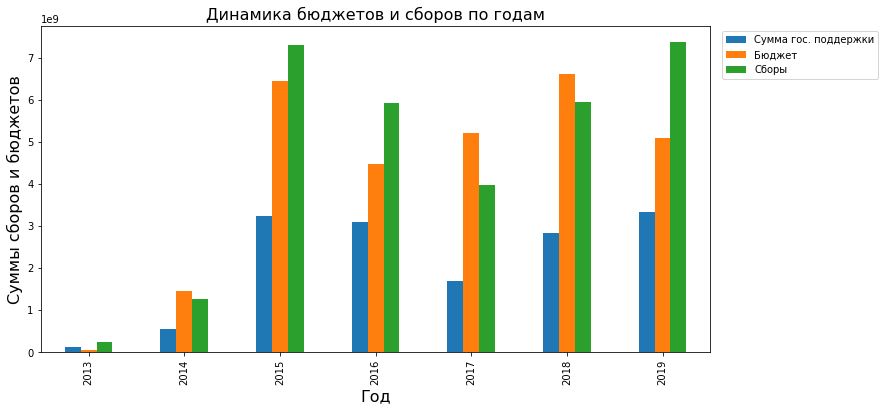

In [88]:
# вывод графика с динамикой бюджетов и сборов по годам
fig, ax = plt.subplots(figsize=(12, 6))
supported_payback_data.plot(kind='bar', ax=ax)

ax.set_title('Динамика бюджетов и сборов по годам', fontsize = 16)
ax.set_ylabel('Суммы сборов и бюджетов', fontsize = 16)
ax.set_xlabel('Год', fontsize = 16)
ax.legend(labels=['Сумма гос. поддержки', 'Бюджет', 'Сборы'], bbox_to_anchor=(1.01, 1), loc='upper left')

plt.show()

Во всех годах начиная с 2015 сборы фильмов превышают суммы гос. поддержки и бюджеты, за исключением 2017 года. Это указывает на рентабельность кинопроизводства в эти годы.

2017 год выделяется спадом в показателях по сравнению с предыдущими годами, как мы уже видели в исследовании выше. Это может указывать на спад в активности кинопроизводства.

В 2019 году наблюдается наибольшее превышение сборов над бюджетами и гос. поддержкой, что может свидетельствовать о высоких кассовых успехах фильмов, выпущенных в этот период.

В целом судя по данным можно утверждать, что вклады гос. поддержки в киноиндустрию в 2015-2019 годах окупились.

Посмотрим как распределялись средства гос. поддержки по типам фильмов.

In [89]:
# создание сводной таблицы с данными о суммах гос. поддержки, бюджете и сборах в разбиуке по типам фильмов
supported_films.pivot_table(index='type', values=['budget', 'all_supported', 'box_office'], aggfunc='sum')

,all_supported,box_office,budget
type,,,
Анимационный,1901520000.00,5068578304.00,5240454656.00
Документальный,3000000.00,0.00,33000000.00
Художественный,12957093888.00,24279117824.00,26761910272.00


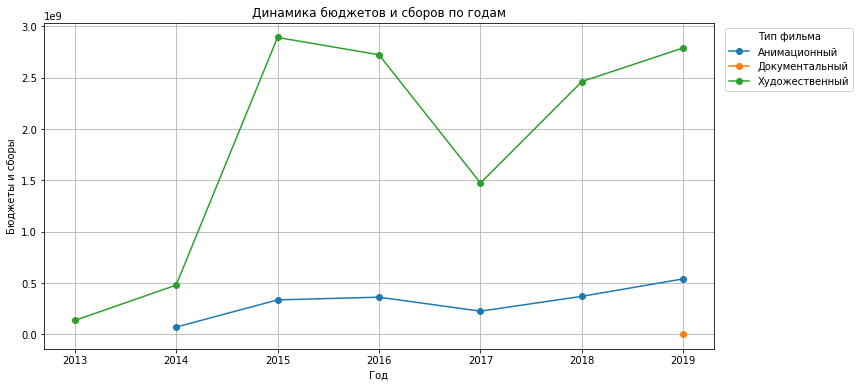

In [90]:
# вывод графика с динамикой сумм гос. поддержки в разбивке по типам фильмов по годам
(
    supported_films.pivot_table(index='show_start_year', columns='type', values='all_supported', aggfunc='sum')
    .plot(kind='line', marker='o', figsize=(12, 6))
)    

plt.title('Динамика бюджетов и сборов по годам')
plt.xlabel('Год')
plt.ylabel('Бюджеты и сборы')
plt.legend(title='Тип фильма', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

По данным графика и таблицы видно что наибольшая доля средств гос. поддержки выделялась на художественные фильмы. Также по данным графика видно, что для анимационных фильмов количество средств гос. поддержки довольно стабильно до 2018 года, а потом показывает тенденцию к росту.

In [91]:
supported_films.pivot_table(index='age_restriction', values=['budget', 'box_office', 'all_supported'], aggfunc='sum')

,all_supported,box_office,budget
age_restriction,,,
«0+» - для любой зрительской аудитории,273520000.00,679139840.00,902984576.00
«12+» - для детей старше 12 лет,5688394240.00,10711278592.00,11603085312.00
«16+» - для детей старше 16 лет,4431053312.00,8214196736.00,9016543232.00
«18+» - запрещено для детей,953346880.00,1337012992.00,2250837248.00
«6+» - для детей старше 6 лет,3515300096.00,8406068224.00,8261914112.00


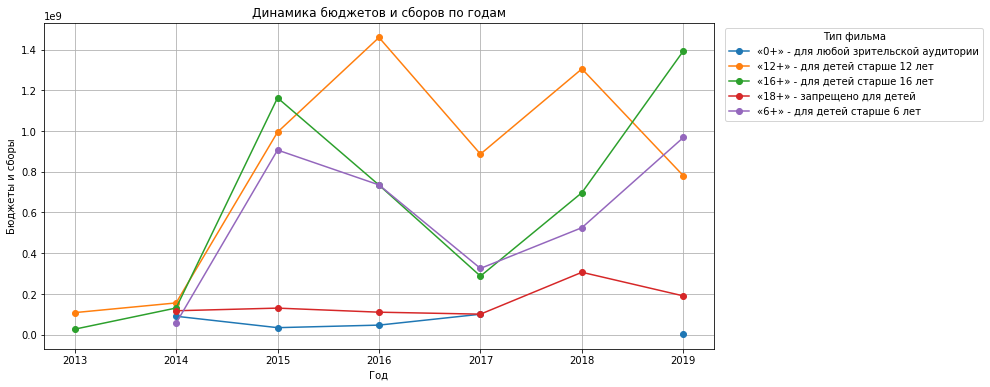

In [92]:
# вывод графика с динамикой бюджетов и сборов по годам
(
    supported_films.pivot_table(index='show_start_year', columns='age_restriction',values='all_supported', aggfunc='sum')
    .plot(kind='line', marker='o', figsize=(12, 6))
)    

plt.title('Динамика бюджетов и сборов по годам')
plt.xlabel('Год')
plt.ylabel('Бюджеты и сборы')
plt.legend(title='Тип фильма', bbox_to_anchor=(1.01, 1), loc='upper left')
plt.grid(True)
plt.show()

По данным таблицы и графика видно, что большая часть средств гос. поддержки выделяется на фильму с возрастным ограничением "6+", "12+" и "16+". Эти же категории являются наиболее популярными и окупающимися по данным исследования выше. Судя по графику в 2017 году было значительное снижение в обхемах гос. финансирования, но с 2018 они восстановились и в 2019 показывают тенденцию к росту в категориях фильмов "6+" и "16+".

## Общий вывод

В предоставленных для анализа исходных данных были обнаружены пропуски и аномальные значения.
Пропуски были обнаружены в столбцах film_studio, production_country, director, producer, ratings, genres, refundable_support, nonrefundable_support, budget, financing_source и box_office. Заполнить данные логическим путем невозможно, поэтому данные были оставлены как есть с пропусками. Пропуски в столбцах refundable_support, nonrefundable_support с большой долей вероятности говорят об отсутствии гос. поддержки для данных фильмов, но у нас нет в этом уверенности и для дальнейшего исследования пропуски в этих столбцах лучше оставить как есть.

Практически во всех столбцах с категориальными данными (title, puNumber, type, film_studio, production_country, director, producer, age_restriction и genres) были обнаружены лишние пробелы в начале и конце строки. Лишние пробелы были удалены для нормализации данных.

При исследовании количественных данных (refundable_support, nonrefundable_support, ratings, budget, box_office) в столбцах box_office и budget были обнаружены аномальные значения. В столбце box_office в части строк донные о сборах были представлены в разных мерах (млн. руб, тыс. руб, руб.). Для нормализации данных в строках где это можно предположить значения были приведены к общей мере (руб.). Выбивающиеся значения в столбцах box_office и budget были исключены их выборки для избежания влияния на дальнейшее исследование.

Также в данных обнаружено большое количество неявных дубликатов в столбцах production_country, title, film_studio, director. В столбце production_country неявные дубликаты были обработаны и написания стран приведены к единому виду. В остальных столбцах на обработку неявных дубликатов требуется большое количество времени и сил, но эти данные не участвуют в дальнейшем анализе, а каждый фильм имеет индивидуальный номер проката (puNumber). Поэтому неявные дубликаты в этих столбцах оставили как есть.

Для дальнейшего анализа в данные были добавлены столбцы с главным режисером, основным жанром, годом выхода в прокат, долей гос. поддержки от общего бюджета.

___

<b>Анализ количества фильмов в прокате по годам</b>

Доля фильмов, вышедших в прокат, по сравнению с общим количеством выпущенных фильмов увеличивалась в течение всего рассматриваемого периода. Наибольшая доля фильмов в прокате зафиксирована в 2017 году. Однако в количественном выражении в этот год наблюдалось снижение как общего количества фильмов, так и количества фильмов в прокате. Хотя общее количество фильмов не сильно изменилось на всем рассматриваемом периоде, увеличение доли фильмов в прокате может указывать на улучшение качества фильмов или изменение стратегий проката, приводящих к большему числу фильмов, попадающих на экраны. Также это может быть обусловлено более полным представлением данных о прокате за период 2015-2019 гг., так как данных о сборах в кинотеатрах до 2015 года крайне мало.

<b>Анализ динамики суммы сборов по годам</b>

Динамика общей суммы сборов по годам аналогична динамике количества фильмов в прокате. Посмотрим, как менялись медианные и средние значения ежегодных сборов. Средняя сумма сборов показывает значительные колебания с тенденцией к росту до 2017 года, после чего наблюдается снижение. Медианная сумма сборов остаётся относительно стабильной на протяжении всего периода с незначительными колебаниями.

Существенная разница между средней и медианной суммой сборов указывает на наличие фильмов с очень высокими сборами, которые сильно влияют на среднее значение.

Начиная с 2017 года, наблюдается спад средней суммы сборов, что может указывать на снижение кассовых сборов некоторых фильмов. Медианная сумма сборов остаётся стабильной, что может указывать на то, что большинство фильмов имеют относительно неизменные сборы, несмотря на изменения в средней сумме.

Таким образом, можно сделать вывод, что в период с 2010 по 2019 годы средняя сумма сборов фильмов значительно колебалась, достигая пика в 2017 году, а затем начала снижаться. Медианная сумма сборов остаётся более стабильной, указывая на устойчивость сборов большинства фильмов. Большие различия между средней и медианной суммами сборов указывают на наличие отдельных фильмов с очень высокими сборами, которые сильно влияют на средние значения.

<b>Анализ влияния возрастных ограничений на сумму сборов</b>

Категория «16+» имеет наибольшую долю от общей суммы сборов, составляя 35.2%. Категория «18+» занимает второе место по сумме сборов с долей 22.9%. Категория «12+» также занимает значительную часть рынка с долей 19.4%. Это указывает на то, что наибольшая доля фильмов в прокате рассчитана на взрослую аудиторию.

Фильмы для категорий «0+» и «6+» в прокате представлены небольшим количеством, но имеют довольно крупные суммы сборов. Наибольшее среднее значение сборов у фильмов в категории «6+». Это указывает на то, что в данной категории есть фильмы со сборами гораздо выше, чем у фильмов других категорий.

Также достаточно высокие средние суммы сборов у фильмов категорий «12+» и «16+». Это указывает на то, что чем шире аудитория просмотра фильма, тем более крупные сборы он может сделать.

Для фильмов категории «0+» наблюдаются наименьшие суммы сборов и количество фильмов в прокате. Вероятно, это связано со спецификой целевой аудитории. Обычно в эту категорию входят фильмы и мультфильмы, рассчитанные на маленьких детей и/или семейный просмотр.

Исходя из данных, можно сделать вывод, что в прокате лидирующие позиции по количеству фильмов и суммам сборов занимают фильмы с ограничением «16+» и «18+». Однако наиболее высокие средние значения сборов у фильмов категорий «12+» и «6+».

<b>Исследование фильмов, которые получили государственную поддержку</b>

По данным видно, что государственную поддержку для фильмов в выборке начали выделять с 2013-2014 годов. Наибольшее количество фильмов, получивших государственную поддержку, было выпущено в 2015 году. Наибольшую сумму на государственную поддержку кино выделяли в 2015 и 2019 годах.

Оценки большинства фильмов с государственной поддержкой находятся в диапазоне от 5 до 7-7.5. Это значит, что большая часть фильмов с участием государственной поддержки получает хорошие оценки в рейтингах.

Во всех годах, начиная с 2015, сборы фильмов превышают суммы государственной поддержки и бюджеты, за исключением 2017 года. Это указывает на рентабельность кинопроизводства в эти годы.

2017 год выделяется спадом в показателях по сравнению с предыдущими годами, как мы уже видели в исследовании выше. Это может указывать на спад в активности кинопроизводства.

В 2019 году наблюдается наибольшее превышение сборов над бюджетами и государственной поддержкой, что может свидетельствовать о высоких кассовых успехах фильмов, выпущенных в этот период.

В целом, судя по данным, можно утверждать, что вклады государственной поддержки в киноиндустрию в 2015-2019 годах окупились.

По данным можно сказать, что наибольшая доля средств государственной поддержки выделялась на художественные фильмы, в меньшем объеме на анимационные и практически не выделялась на документальные фильмы. Также по данным видно, что для анимационных фильмов количество средств государственной поддержки довольно стабильно до 2018 года, а потом показывает тенденцию к росту.

По данным таблицы и графика видно, что большая часть средств государственной поддержки выделяется на фильмы с возрастным ограничением «6+», «12+» и «16+». Эти же категории являются наиболее популярными и окупающимися по данным исследования выше.
___

<b>Вывод:</b>

За исследуемый период наблюдается увеличение доли фильмов, вышедших в прокат, несмотря на то, что общее количество выпущенных фильмов остаётся практически неизменным. Наибольшая доля фильмов в прокате была зафиксирована в 2017 году, хотя в количественном выражении и общее число фильмов, и количество фильмов в прокате сократилось. Динамика сборов аналогична динамике количества фильмов в прокате: средняя сумма сборов достигла пика в 2017 году, а затем начала снижаться, при этом медианная сумма сборов осталась стабильной. Существенная разница между средней и медианной суммами сборов указывает на влияние некоторого количества фильмов с высокими доходами. Наибольшая доля сборов приходится на фильмы с возрастным ограничением «16+», за которыми следуют фильмы категории «18+». Фильмы для младшей аудитории («0+» и «6+») имеют меньшее количество в прокате, но некоторые из них показывают значительные кассовые сборы. 

Фильмы, получившие государственную поддержку, начали активно выходить с 2013-2014 годов, и наибольшее количество таких фильмов было выпущено в 2015 году. В большинстве случаев сборы фильмов с государственной поддержкой превышают их бюджеты, что свидетельствует о рентабельности таких вложений.

___

Стоит обратить внимание на то, что для большей части фильмов в выборке не было представлено данных о бюджете (данные о бюджете представлены только для фильмов с гос. поддержкой) и сборах. Неполнота данных в выборке может влиять на результаты исследования.
___

Для более точной аналитики и построения более точных прогнозов рекомендуется исправить ошибки в сборе данных. Пропуски в данных могут появляться по различным причинам:

1. Технические ошибки при сборе данных
2. Человеческий фактор (пропуски при заполнении данных в "ручных" отчетах или ввод некорректных данных)
3. Несуществующие значения (например отсутствие режиссера/продюссера фильма или данных о кассовых сборах у фильмов не вышедших в прокат в кинотеатрах)
4. Ошибки при выгрузке или передаче данных